# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn import metrics

import sys
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')
import stockstats
from stockstats import StockDataFrame as Sdf

from nsepy import get_history
from datetime import date

import Technical_Indicators_v4 as ti

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import suite of algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree

np.random.seed(7777)  # for reproducibility

# PORTFOLIO CREATION

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance and returns a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')

# Sector-wise sorted list of stocks 
df.sort_values(by='Industry')

Company Name                  Industry  \
18                            Hero MotoCorp Ltd.                AUTOMOBILE   
14                            Eicher Motors Ltd.                AUTOMOBILE   
41                              Tata Motors Ltd.                AUTOMOBILE   
10                                    Bosch Ltd.                AUTOMOBILE   
33                      Maruti Suzuki India Ltd.                AUTOMOBILE   
5                                Bajaj Auto Ltd.                AUTOMOBILE   
32                      Mahindra & Mahindra Ltd.                AUTOMOBILE   
45                         UltraTech Cement Ltd.  CEMENT & CEMENT PRODUCTS   
1                            Ambuja Cements Ltd.  CEMENT & CEMENT PRODUCTS   
30                          Larsen & Toubro Ltd.              CONSTRUCTION   
2                              Asian Paints Ltd.            CONSUMER GOODS   
23                                    I T C Ltd.            CONSUMER GOODS   
21                       Hindustan Unilever Ltd.            CONSUMER GOODS   
20          Hindustan Petroleum Corporation Ltd.                    ENERGY   
34                                     NTPC Ltd.                    ENERGY   
26                   Indian Oil Corporation Ltd.                    ENERGY   
37                      Reliance Industries Ltd.                    ENERGY   
35            Oil & Natural Gas Corporation Ltd.                    ENERGY   
36          Power Grid Corporation of India Ltd.                    ENERGY   
15                             GAIL (India) Ltd.                    ENERGY   
7              Bharat Petroleum Corporation Ltd.                    ENERGY   
44                                      UPL Ltd.  FERTILISERS & PESTICIDES   
38                           State Bank of India        FINANCIAL SERVICES   
4                                 Axis Bank Ltd.        FINANCIAL SERVICES   
6                             Bajaj Finance Ltd.        FINANCIAL SERVICES   
29                      Kotak Mahindra Bank Ltd.        FINANCIAL SERVICES   
17                                HDFC Bank Ltd.        FINANCIAL SERVICES   
27                            IndusInd Bank Ltd.        FINANCIAL SERVICES   
25               Indiabulls Housing Finance Ltd.        FINANCIAL SERVICES   
48                                 Yes Bank Ltd.        FINANCIAL SERVICES   
22  Housing Development Finance Corporation Ltd.        FINANCIAL SERVICES   
24                               ICICI Bank Ltd.        FINANCIAL SERVICES   
28                                  Infosys Ltd.                        IT   
40                Tata Consultancy Services Ltd.                        IT   
16                         HCL Technologies Ltd.                        IT   
47                                    Wipro Ltd.                        IT   
43                            Tech Mahindra Ltd.                        IT   
49            Zee Entertainment Enterprises Ltd.     MEDIA & ENTERTAINMENT   
19                      Hindalco Industries Ltd.                    METALS   
12                               Coal India Ltd.                    METALS   
42                               Tata Steel Ltd.                    METALS   
46                                  Vedanta Ltd.                    METALS   
39            Sun Pharmaceutical Industries Ltd.                    PHARMA   
13                 Dr. Reddy's Laboratories Ltd.                    PHARMA   
11                                    Cipla Ltd.                    PHARMA   
3                          Aurobindo Pharma Ltd.                    PHARMA   
31                                    Lupin Ltd.                    PHARMA   
0     Adani Ports and Special Economic Zone Ltd.                  SERVICES   
9                           Bharti Infratel Ltd.                   TELECOM   
8                             Bharti Airtel Ltd.                   TELECOM   

        Symbol Series     ISIN Code  
18  HEROMOTOCO     

### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
""" Taking 5 yrs of historic data for creating clusters based on daily-returns of stocks for NIFTY50 """

# Date format is 'yyyy-mm-dd'

start_date = '2013-01-01' 
end_date = '2018-01-01' 

In [6]:
# Fetching data for model building and back-testing

panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  50 of 50 downloaded


In [7]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1233 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2013-01-01 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [8]:
adj_close = panel_data.loc['Adj Close']
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     391.538849      91.947716   
2013-01-02     135.441299    186.749207     387.015350      95.868973   
2013-01-03     135.294571    188.760681     389.206238      96.106636   
2013-01-04     134.511963    188.440704     389.675415      95.845215   
2013-01-07     137.006561    186.383499     388.998230      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01   233.687469            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03   238.360504            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-07   235.428085            NaN     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

In [9]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS      0
AMBUJACEM.NS       0
ASIANPAINT.NS      0
AUROPHARMA.NS      0
AXISBANK.NS        0
BAJAJ-AUTO.NS    493
BAJFINANCE.NS      0
BHARTIARTL.NS      0
BOSCHLTD.NS        0
BPCL.NS            0
CIPLA.NS           0
COALINDIA.NS       0
DRREDDY.NS         0
EICHERMOT.NS       0
GAIL.NS            0
HCLTECH.NS         0
HDFC.NS            0
HDFCBANK.NS        0
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDPETRO.NS       0
HINDUNILVR.NS      0
IBULHSGFIN.NS    140
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFRATEL.NS        0
INFY.NS            0
IOC.NS             0
ITC.NS             0
KOTAKBANK.NS       0
LT.NS              0
LUPIN.NS           0
M&M.NS             0
MARUTI.NS          0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBIN.NS            0
SUNPHARMA.NS       0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
ULTRACEMCO.NS      0
UPL.NS       

### Filling the missing data with the forward and backward fill methods

In [10]:
# Forward fill
adj_close = adj_close.fillna(method='ffill')

# Backward fill
adj_close = adj_close.fillna(method = 'bfill')


In [11]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    0
AMBUJACEM.NS     0
ASIANPAINT.NS    0
AUROPHARMA.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BOSCHLTD.NS      0
BPCL.NS          0
CIPLA.NS         0
COALINDIA.NS     0
DRREDDY.NS       0
EICHERMOT.NS     0
GAIL.NS          0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
IBULHSGFIN.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFRATEL.NS      0
INFY.NS          0
IOC.NS           0
ITC.NS           0
KOTAKBANK.NS     0
LT.NS            0
LUPIN.NS         0
M&M.NS           0
MARUTI.NS        0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
VEDL.NS          0
WIPRO.NS         0
YESBANK.NS       0
ZEEL.NS          0
dtype: i

In [12]:
adj_close.to_csv('stocks_adj_close.csv')
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     391.538849      91.947716   
2013-01-02     135.441299    186.749207     387.015350      95.868973   
2013-01-03     135.294571    188.760681     389.206238      96.106636   
2013-01-04     134.511963    188.440704     389.675415      95.845215   
2013-01-07     137.006561    186.383499     388.998230      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01   233.687469    2300.317871     101.747940     312.294800   
2013-01-02   237.828903    2300.317871     100.630241     311.276733   
2013-01-03   238.360504    2300.317871     103.339737     318.015167   
2013-01-04   236.474152    2300.317871     103.388054     317.045593   
2013-01-07   235.428085    2300.317871     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

### Caluclating daily-returns 

In [13]:
daily_returns = pd.DataFrame()

In [14]:
daily_returns = adj_close.pct_change()
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01            NaN           NaN            NaN            NaN   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01          NaN            NaN            NaN            NaN   
2013-01-02     0.017722            0.0      -0.010985      -0.003260   
2013-01-03     0.002235            0.0       0.026925       0.021648   
2013-01-04    -0.007914            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01          NaN       NaN    ...               NaN           NaN   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01       NaN       NaN            NaN       NaN       NaN       NaN   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01         NaN       NaN  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily-returns)

In [15]:
daily_returns.iloc[0, :] = 0
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01       0.000000      0.000000       0.000000       0.000000   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01     0.000000            0.0       0.000000       0.000000   
2013-01-02     0.017722            0.0      -0.010985      -0.003260   
2013-01-03     0.002235            0.0       0.026925       0.021648   
2013-01-04    -0.007914            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01     0.000000  0.000000    ...          0.000000      0.000000   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01    0.000000  0.000000  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

In [16]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

Date  ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
0 2013-01-01       0.000000      0.000000       0.000000       0.000000   
1 2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2 2013-01-03      -0.001083      0.010771       0.005661       0.002479   
3 2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
4 2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

   AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  BOSCHLTD.NS  \
0     0.000000            0.0       0.000000       0.000000     0.000000   
1     0.017722            0.0      -0.010985      -0.003260     0.009347   
2     0.002235            0.0       0.026925       0.021648    -0.007023   
3    -0.007914            0.0       0.000468      -0.003049    -0.006669   
4    -0.004424            0.0      -0.001476      -0.000612    -0.001835   

     ...     TATAMOTORS.NS  TATASTEEL.NS    TCS.NS  TECHM.NS  ULTRACEMCO.NS  \
0    ...          0.000000      0.000000  0.000000  0.000000       0.000000   
1    ...          0.003944     -0.000113 -0.000672  0.006478       0.006155   
2    ...          0.000315      0.009470  0.013694  0.001754      -0.005110   
3    ...         -0.008487     -0.019896  0.014524  0.001224       0.008420   
4    ...         -0.006816      0.017072 -0.003348 -0.016395      -0.000588   

     UPL.NS   VEDL.NS  WIPRO.NS  YESBANK.NS   ZEEL.NS  
0  0.000000  0.000000  0.000000    0.000000  0.000000  
1 -0.005287  0.021652 -0.007936    0.022746  0.034923  
2  0.038725  0.007393  0.010286    0.008917  0.000216  
3 -0.006579 -0.013209  0.014706   -0.006400 -0.017950  
4  0.009934  0.004710  0.003221    0.018812 -0.016736  

[5 rows x 51 columns]

In [17]:
daily_returns = daily_returns.T
daily_returns.head()

0                    1                    2     \
Date           2013-01-01 00:00:00  2013-01-02 00:00:00  2013-01-03 00:00:00   
ADANIPORTS.NS                    0           0.00471679          -0.00108333   
AMBUJACEM.NS                     0            0.0121406             0.010771   
ASIANPAINT.NS                    0           -0.0115531           0.00566098   
AUROPHARMA.NS                    0            0.0426466           0.00247904   

                              3                    4                    5     \
Date           2013-01-04 00:00:00  2013-01-07 00:00:00  2013-01-08 00:00:00   
ADANIPORTS.NS          -0.00578447            0.0185455           -0.0185649   
AMBUJACEM.NS           -0.00169515            -0.010917          -0.00907528   
ASIANPAINT.NS           0.00120547          -0.00173782         -5.67997e-05   
AUROPHARMA.NS          -0.00272011         -0.000247879          -0.00446434   

                              6                    7                    8     \
Date           2013-01-09 00:00:00  2013-01-10 00:00:00  2013-01-11 00:00:00   
ADANIPORTS.NS           -0.0167334           0.00480974           -0.0301915   
AMBUJACEM.NS            -0.0247525           -0.0266497           -0.0279009   
ASIANPAINT.NS          -0.00681588          -0.00033249           -0.0144978   
AUROPHARMA.NS           -0.0209268           -0.0287531           -0.0332722   

                              9            ...                          1223  \
Date           2013-01-14 00:00:00         ...           2017-12-18 00:00:00   
ADANIPORTS.NS            0.0349278         ...                    0.00809767   
AMBUJACEM.NS             0.0195815         ...                   -0.00151284   
ASIANPAINT.NS            0.0153741         ...                     0.0164925   
AUROPHARMA.NS            0.0409214         ...                    0.00674051   

                              1224                 1225                 1226  \
Date           2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
ADANIPORTS.NS           0.00296585          -0.00344996          -0.00519289   
AMBUJACEM.NS             0.0251893           -0.0118233           0.00429979   
ASIANPAINT.NS          0.000483513          -0.00193366           0.00211368   
AUROPHARMA.NS            0.0200863           0.00313592          -0.00581602   

                              1227                 1228                 1229  \
Date           2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
ADANIPORTS.NS         -0.000372841           0.00596791           -0.0008651   
AMBUJACEM.NS           -0.00372301            0.0213005          -0.00731797   
ASIANPAINT.NS          8.78435e-05            0.0112039          -0.00147731   
AUROPHARMA.NS          -0.00358319           0.00352266            0.0103115   

                              1230                 1231                 1232  
Date           2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
ADANIPORTS.NS           -0.0136071            0.0174316           -0.0147911  
AMBUJACEM.NS            0.00110574           0.00165684           -0.0147032  
ASIANPAINT.NS          -0.00404686            0.0123209           -0.0128183  
AUROPHARMA.NS           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1233 columns]

In [18]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index                    0                    1  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

                     2                    3                    4  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566098           0.00120547          -0.00173782   
4           0.00247904          -0.00272011         -0.000247879   

                     5                    6                    7  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3         -5.67997e-05          -0.00681588          -0.00033249   
4          -0.00446434           -0.0209268           -0.0287531   

                     8         ...                          1223  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164925   
4           -0.0332722         ...                    0.00674051   

                  1224                 1225                 1226  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483513          -0.00193366           0.00211368   
4            0.0200863           0.00313592          -0.00581602   

                  1227                 1228                 1229  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78435e-05            0.0112039          -0.00147731   
4          -0.00358319           0.00352266            0.0103115   

                  1230                 1231                 1232  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404686            0.0123209           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [19]:
column_names = daily_returns.iloc[0]
#column_names

In [20]:
daily_returns = daily_returns.rename(columns=column_names)
daily_returns.head()

Date  2013-01-01 00:00:00  2013-01-02 00:00:00  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

   2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566098           0.00120547          -0.00173782   
4           0.00247904          -0.00272011         -0.000247879   

   2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3         -5.67997e-05          -0.00681588          -0.00033249   
4          -0.00446434           -0.0209268           -0.0287531   

   2013-01-11 00:00:00         ...           2017-12-18 00:00:00  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164925   
4           -0.0332722         ...                    0.00674051   

   2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483513          -0.00193366           0.00211368   
4            0.0200863           0.00313592          -0.00581602   

   2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78435e-05            0.0112039          -0.00147731   
4          -0.00358319           0.00352266            0.0103115   

   2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404686            0.0123209           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [21]:
daily_returns = daily_returns.drop(daily_returns.index[[0]])
daily_returns.head()

Date 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
1  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
2   AMBUJACEM.NS                   0           0.0121406            0.010771   
3  ASIANPAINT.NS                   0          -0.0115531          0.00566098   
4  AUROPHARMA.NS                   0           0.0426466          0.00247904   
5    AXISBANK.NS                   0           0.0177221          0.00223522   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
1         -0.00578447           0.0185455          -0.0185649   
2         -0.00169515           -0.010917         -0.00907528   
3          0.00120547         -0.00173782        -5.67997e-05   
4         -0.00272011        -0.000247879         -0.00446434   
5         -0.00791386          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
1          -0.0167334          0.00480974          -0.0301915   
2          -0.0247525          -0.0266497          -0.0279009   
3         -0.00681588         -0.00033249          -0.0144978   
4          -0.0209268          -0.0287531          -0.0332722   
5         -0.00782916           0.0135962         -0.00285095   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
1         ...                  0.00809767          0.00296585   
2         ...                 -0.00151284           0.0251893   
3         ...                   0.0164925         0.000483513   
4         ...                  0.00674051           0.0200863   
5         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
1         -0.00344996         -0.00519289        -0.000372841   
2          -0.0118233          0.00429979         -0.00372301   
3         -0.00193366          0.00211368         8.78435e-05   
4          0.00313592         -0.00581602         -0.00358319   
5          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
1          0.00596791          -0.0008651          -0.0136071   
2           0.0213005         -0.00731797          0.00110574   
3           0.0112039         -0.00147731         -0.00404686   
4          0.00352266           0.0103115          -0.0106405   
5          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
1           0.0174316          -0.0147911  
2          0.00165684          -0.0147032  
3           0.0123209          -0.0128183  
4          0.00665786         -0.00581441  
5           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [22]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0      1  ADANIPORTS.NS                   0          0.00471679   
1      2   AMBUJACEM.NS                   0           0.0121406   
2      3  ASIANPAINT.NS                   0          -0.0115531   
3      4  AUROPHARMA.NS                   0           0.0426466   
4      5    AXISBANK.NS                   0           0.0177221   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566098          0.00120547         -0.00173782   
3          0.00247904         -0.00272011        -0.000247879   
4          0.00223522         -0.00791386          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2        -5.67997e-05         -0.00681588         -0.00033249   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167         -0.00782916           0.0135962   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [23]:
daily_returns.loc[:,'index'] = daily_returns.iloc[:,1] 

In [24]:
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0  ADANIPORTS.NS  ADANIPORTS.NS                   0          0.00471679   
1   AMBUJACEM.NS   AMBUJACEM.NS                   0           0.0121406   
2  ASIANPAINT.NS  ASIANPAINT.NS                   0          -0.0115531   
3  AUROPHARMA.NS  AUROPHARMA.NS                   0           0.0426466   
4    AXISBANK.NS    AXISBANK.NS                   0           0.0177221   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566098          0.00120547         -0.00173782   
3          0.00247904         -0.00272011        -0.000247879   
4          0.00223522         -0.00791386          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2        -5.67997e-05         -0.00681588         -0.00033249   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167         -0.00782916           0.0135962   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [25]:
daily_returns = daily_returns.drop(daily_returns.columns[[1]], axis=1)
daily_returns.head()

index 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
0  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
1   AMBUJACEM.NS                   0           0.0121406            0.010771   
2  ASIANPAINT.NS                   0          -0.0115531          0.00566098   
3  AUROPHARMA.NS                   0           0.0426466          0.00247904   
4    AXISBANK.NS                   0           0.0177221          0.00223522   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
0         -0.00578447           0.0185455          -0.0185649   
1         -0.00169515           -0.010917         -0.00907528   
2          0.00120547         -0.00173782        -5.67997e-05   
3         -0.00272011        -0.000247879         -0.00446434   
4         -0.00791386          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
0          -0.0167334          0.00480974          -0.0301915   
1          -0.0247525          -0.0266497          -0.0279009   
2         -0.00681588         -0.00033249          -0.0144978   
3          -0.0209268          -0.0287531          -0.0332722   
4         -0.00782916           0.0135962         -0.00285095   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [26]:
companies = daily_returns['index']
companies

0     ADANIPORTS.NS
1      AMBUJACEM.NS
2     ASIANPAINT.NS
3     AUROPHARMA.NS
4       AXISBANK.NS
5     BAJAJ-AUTO.NS
6     BAJFINANCE.NS
7     BHARTIARTL.NS
8       BOSCHLTD.NS
9           BPCL.NS
10         CIPLA.NS
11     COALINDIA.NS
12       DRREDDY.NS
13     EICHERMOT.NS
14          GAIL.NS
15       HCLTECH.NS
16          HDFC.NS
17      HDFCBANK.NS
18    HEROMOTOCO.NS
19      HINDALCO.NS
20     HINDPETRO.NS
21    HINDUNILVR.NS
22    IBULHSGFIN.NS
23     ICICIBANK.NS
24    INDUSINDBK.NS
25      INFRATEL.NS
26          INFY.NS
27           IOC.NS
28           ITC.NS
29     KOTAKBANK.NS
30            LT.NS
31         LUPIN.NS
32           M&M.NS
33        MARUTI.NS
34          NTPC.NS
35          ONGC.NS
36     POWERGRID.NS
37      RELIANCE.NS
38          SBIN.NS
39     SUNPHARMA.NS
40    TATAMOTORS.NS
41     TATASTEEL.NS
42           TCS.NS
43         TECHM.NS
44    ULTRACEMCO.NS
45           UPL.NS
46          VEDL.NS
47         WIPRO.NS
48       YESBANK.NS
49          ZEEL.NS


In [27]:
daily_returns = daily_returns.drop('index', axis=1)
daily_returns.head()

2013-01-01  2013-01-02  2013-01-03  2013-01-04   2013-01-07   2013-01-08  \
0          0  0.00471679 -0.00108333 -0.00578447    0.0185455   -0.0185649   
1          0   0.0121406    0.010771 -0.00169515    -0.010917  -0.00907528   
2          0  -0.0115531  0.00566098  0.00120547  -0.00173782 -5.67997e-05   
3          0   0.0426466  0.00247904 -0.00272011 -0.000247879  -0.00446434   
4          0   0.0177221  0.00223522 -0.00791386   -0.0044236  -0.00914167   

   2013-01-09  2013-01-10  2013-01-11 2013-01-14     ...      2017-12-18  \
0  -0.0167334  0.00480974  -0.0301915  0.0349278     ...      0.00809767   
1  -0.0247525  -0.0266497  -0.0279009  0.0195815     ...     -0.00151284   
2 -0.00681588 -0.00033249  -0.0144978  0.0153741     ...       0.0164925   
3  -0.0209268  -0.0287531  -0.0332722  0.0409214     ...      0.00674051   
4 -0.00782916   0.0135962 -0.00285095   0.016128     ...      0.00127751   

    2017-12-19  2017-12-20  2017-12-21   2017-12-22  2017-12-26   2017-12-27  \
0   0.00296585 -0.00344996 -0.00519289 -0.000372841  0.00596791   -0.0008651   
1    0.0251893  -0.0118233  0.00429979  -0.00372301   0.0213005  -0.00731797   
2  0.000483513 -0.00193366  0.00211368  8.78435e-05   0.0112039  -0.00147731   
3    0.0200863  0.00313592 -0.00581602  -0.00358319  0.00352266    0.0103115   
4   0.00911328  0.00153522   -0.010009   0.00847065  0.00252895 -0.000720764   

   2017-12-28  2017-12-29  2018-01-01  
0  -0.0136071   0.0174316  -0.0147911  
1  0.00110574  0.00165684  -0.0147032  
2 -0.00404686   0.0123209  -0.0128183  
3  -0.0106405  0.00665786 -0.00581441  
4   -0.013974   0.0312701  0.00274845  

[5 rows x 1233 columns]

In [28]:
daily_returns.shape

(50, 1233)

### Data preparation for Unsupervised Learning 

### To create a diversified portfolio of stocks we will cluster them and then identify one stock from each cluster that is closest to the centroid of the respective cluster 

## CLUSTERING - based on ONLY daily returns of the stocks

In [29]:
from sklearn import preprocessing
# normalize the data row-wise(sample-wise) for each stock's daily returns
dr_norm = preprocessing.normalize(daily_returns)
dr_norm

array([[ 0.        ,  0.00552943, -0.00126998, ..., -0.01595144,
         0.02043483, -0.01733937],
       [ 0.        ,  0.01962536,  0.01741137, ...,  0.00178744,
         0.00267829, -0.0237678 ],
       [ 0.        , -0.01986238,  0.00973248, ..., -0.00695744,
         0.0211823 , -0.02203748],
       ...,
       [ 0.        , -0.01501664,  0.01946185, ...,  0.0086399 ,
         0.03839567,  0.01384835],
       [ 0.        ,  0.02568903,  0.01007031, ..., -0.00591291,
         0.00594403, -0.00913817],
       [ 0.        ,  0.05257221,  0.00032568, ..., -0.00384451,
        -0.01040674, -0.00672733]])

In [30]:
# Clustering

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num, random_state=7)
    k_means.fit(dr_norm)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_of_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

cluster_errors  num_of_clusters
0        38.069963                1
1        35.440212                2
2        33.598283                3
3        32.080907                4
4        31.027438                5
5        29.897327                6
6        28.622170                7
7        27.455511                8
8        26.616651                9
9        25.819104               10
10       24.835451               11
11       23.901022               12
12       23.071774               13
13       22.199972               14

Text(0.5,1,'Cluster_errors v/s No. of clusters')

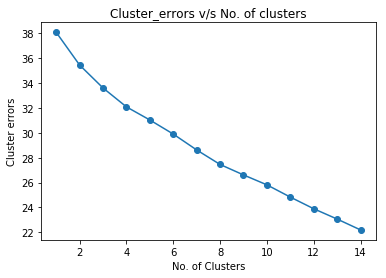

In [31]:
# Elbow plot to find the optimal number of clusters
plt.plot(clusters_df.num_of_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [32]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters=num_clusters, random_state=7)
k_means.fit(dr_norm)

# Cluster label for each stock
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\ncluster_centroids \n', cluster_centroids)

# results
results = pd.DataFrame([daily_returns.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
ticker_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([ticker_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [3, 4, 4, 2, 3, 3, 3, 3, 3, 0, 2, 0, 2, 3, 0, 1, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3, 1, 0, 4, 3, 3, 2, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1, 4, 3, 3, 1, 3, 3]

unique_labels
 [0, 1, 2, 3, 4]

cluster_centroids 
 [[ 0.          0.02443229  0.00839331 ... -0.00588855 -0.00989913
  -0.00777978]
 [ 0.          0.0005362   0.01429005 ... -0.00338518  0.0306845
  -0.01296601]
 [ 0.          0.01356413  0.00040208 ... -0.00432515  0.00396827
  -0.00013006]
 [ 0.          0.01180915  0.004028   ... -0.00309394  0.00957287
  -0.01395685]
 [ 0.         -0.0003471   0.00272643 ... -0.00097066  0.01379986
  -0.02181087]]


Ticker_name  Ticker_index  Cluster_label
14   EICHERMOT.NS            14              0
37    RELIANCE.NS            37              0
27  INDUSINDBK.NS            27              0
11       CIPLA.NS            11              0
35        ONGC.NS            35              0
9     INFRATEL.NS             9              0
20   HINDPETRO.NS            20              0
43       TECHM.NS            43              1
26         IOC.NS            26              1
15        GAIL.NS            15              1
47       WIPRO.NS            47              1
42   TATASTEEL.NS            42              1
31       LUPIN.NS            31              2
3   AUROPHARMA.NS             3              2
12   COALINDIA.NS            12              2
39   SUNPHARMA.NS            39              2
10    BOSCHLTD.NS            10              2
32         M&M.NS            32              3
30          LT.NS            30              3
33      MARUTI.NS            33              3
34        NTPC.NS            34              3
0   ADANIPORTS.NS             0              3
38        SBIN.NS            38              3
40         TCS.NS            40              3
41  TATAMOTORS.NS            41              3
45  ULTRACEMCO.NS            45              3
46        VEDL.NS            46              3
36   POWERGRID.NS            36              3
29   KOTAKBANK.NS            29              3
24   ICICIBANK.NS            24              3
25  IBULHSGFIN.NS            25              3
4     AXISBANK.NS             4              3
5   BAJAJ-AUTO.NS             5              3
6   BAJFINANCE.NS             6              3
7         BPCL.NS             7              3
8   BHARTIARTL.NS             8              3
16     HCLTECH.NS            16              3
13     DRREDDY.NS            13              3
18  HEROMOTOCO.NS            18              3
19    HINDALCO.NS            19              3
22        HDFC.NS            22              3
23         ITC.NS            23              3
48     YESBANK.NS            48              3
17    HDFCBANK.NS            17              3
49        ZEEL.NS            49              3
28        INFY.NS            28              4
21  HINDUNILVR.NS            21              4
44         UPL.NS            44              4
2   ASIANPAINT.NS             2              4
1    AMBUJACEM.NS             1              4

In [33]:
# Compute minimum distances between centroid of each cluster and set of points in the respective cluster

from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []


data_list = dr_norm.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    print('\nTicker indices in cluster {}'.format(i))
    print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = dr_norm[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = dr_norm[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)



Ticker indices in cluster 0
[9, 11, 14, 20, 27, 35, 37]

Ticker indices in cluster 1
[15, 26, 42, 43, 47]

Ticker indices in cluster 2
[3, 10, 12, 31, 39]

Ticker indices in cluster 3
[0, 4, 5, 6, 7, 8, 13, 16, 17, 18, 19, 22, 23, 24, 25, 29, 30, 32, 33, 34, 36, 38, 40, 41, 45, 46, 48, 49]

Ticker indices in cluster 4
[1, 2, 21, 28, 44]


In [34]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [9, 42, 31, 30, 1]


In [35]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
# Rename index column as 'Cluster_No.'
ticker_names.index.name = 'Cluster_No.'
ticker_names.columns = ['Ticker_index', 'Ticker_name']


# Portfolio of stocks

In [36]:
# Writing the ticker names of the portfolio into .csv file
ticker_names.to_csv('Portfolio_stocks.csv')
print('Portfolio of stocks\n')
ticker_names

Portfolio of stocks



Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

# Investment startegy:
# How to distribute funds among the portfolio of stocks to get maximum returns with minimum risk?

# Portfolio Optimization

In [37]:
portfolio_df = pd.read_csv('Portfolio_stocks.csv', index_col=0)
print('Portfolio of stocks')
portfolio_df

Portfolio of stocks


Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

In [38]:
port_stocks = portfolio_df['Ticker_name'].values.tolist()
port_stocks

['INFRATEL.NS', 'TATASTEEL.NS', 'LUPIN.NS', 'LT.NS', 'AMBUJACEM.NS']

In [39]:
adj_close_df = pd.read_csv('stocks_adj_close.csv', index_col=0)[port_stocks]
adj_close_df.head()

INFRATEL.NS  TATASTEEL.NS    LUPIN.NS       LT.NS  AMBUJACEM.NS
Date                                                                       
2013-01-01   175.099014    368.073029  599.083557  646.220032    184.509155
2013-01-02   178.419449    368.031586  599.278503  656.022888    186.749207
2013-01-03   180.943008    371.516693  593.382141  650.972412    188.760681
2013-01-04   183.422272    364.125061  589.142761  647.453186    188.440704
2013-01-07   183.643631    370.341492  583.587463  631.604065    186.383499



***************Analysis of individual stock in the portfolio***************

The annualised mean return of stock INFRATEL.NS is 0.21, and the annualised volatility (standard deviation) is 0.35

The annualised mean return of stock TATASTEEL.NS is 0.19, and the annualised volatility (standard deviation) is 0.36

The annualised mean return of stock LUPIN.NS is 0.12, and the annualised volatility (standard deviation) is 0.28

The annualised mean return of stock LT.NS is 0.18, and the annualised volatility (standard deviation) is 0.29

The annualised mean return of stock AMBUJACEM.NS is 0.11, and the annualised volatility (standard deviation) is 0.28


******************************For the entire Portfolio******************************

Portfolio expected annualised return is 0.16 and volatility is 0.19

*************************************************************************************


Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual sto

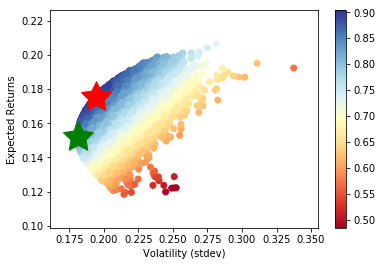

In [40]:


print('\n\n***************Analysis of individual stock in the portfolio***************')
for i in range(0, len(port_stocks)):

    returns = adj_close_df.iloc[:, i].pct_change()

    mean_return = returns.mean()
    return_stdev = returns.std()

    annualised_return = round(mean_return * 252, 2) # 252 trading days in an year
    annualised_stdev = round(return_stdev * np.sqrt(252), 2)

    print ('\nThe annualised mean return of stock {} is {}, and the annualised volatility (standard deviation) is {}'
           .format(port_stocks[i], annualised_return, annualised_stdev))
    
    
""" Similarly, calculate the expected return and volatility (standard deviation) for 
the entire portfolio of stocks. This will capture the benefits of diversification of less than perfect correlation 
between the stocks in the portfolio. """

""" We need our first input, the weights of the stocks in the portfolio – that is, 
how much of each stock do we hold as a percentage of the entire portfolio holdings.
Lets initially assume equal weights"(0.20 in our case) for all the 5 stocks in this portfolio. """

""" We can calculate the portfolio expected return and volatility as follows: """

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set array holding portfolio weights of each stock
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)

#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
 
print('\n\n******************************For the entire Portfolio******************************')
print('\nPortfolio expected annualised return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))
print('\n*************************************************************************************\n\n')    
    
"""We now know the expected return and volatility of our current portfolio. 
But what if we aren’t happy with the level of volatility of our current portfolio and would like to reduce it? 
What if we are willing to take on more risk in search of a higher expected return? 
How can we rearrange the weight of each stock in our portfolio to achieve these goals?"""


"""We can use Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks 
(obviously making sure the weights sum to 100%) and then calculate the expected return, expected volatility and Sharpe Ratio 
for each of the randomly generated portfolios."""

print('Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks\n')

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(port_stocks)-1, num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
"""convert results array to Pandas DataFrame"""
results_frame = pd.DataFrame(results.T, columns=['Returns', 'Volatility', 'Sharpe_Ratio',
                                                 port_stocks[0], port_stocks[1],
                                                 port_stocks[2], port_stocks[3], port_stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()]
print('type(max_sharpe_port)', type(max_sharpe_port))

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
print('type(min_vol_port)', type(min_vol_port))

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Volatility, results_frame.Returns, c=results_frame.Sharpe_Ratio, cmap='RdYlBu')
plt.xlabel('Volatility (stdev)')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5,1,0), color='r',s=1000)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5,1,0), color='g', s=1000)


### Type-1: "Portfolio with Maximum Sharpe Ratio" - RED star in the above plot

In [41]:
print('\n"Type-1: Portfolio with Maximum Sharpe Ratio"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio\n')
print(max_sharpe_port)


"Type-1: Portfolio with Maximum Sharpe Ratio"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio

Returns         0.175315
Volatility      0.194038
Sharpe_Ratio    0.903508
INFRATEL.NS     0.305654
TATASTEEL.NS    0.124366
LUPIN.NS        0.237861
LT.NS           0.310401
AMBUJACEM.NS    0.021718
Name: 19519, dtype: float64


### Type-2: "Portfolio with Minimum Volatility" - GREEN star in the above plot

In [42]:
print('\n"Type-2: Portfolio with Minimum Volatility (stdev)"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio\n')
print(min_vol_port)


"Type-2: Portfolio with Minimum Volatility (stdev)"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio

Returns         0.151947
Volatility      0.180951
Sharpe_Ratio    0.839712
INFRATEL.NS     0.212749
TATASTEEL.NS    0.025607
LUPIN.NS        0.332157
LT.NS           0.211842
AMBUJACEM.NS    0.217645
Name: 9236, dtype: float64


# Fetching data for each stock in the portfolio of stocks

In [43]:
# Fetching data for [clustering + model building] and [back-testing]

start_date = '2013-01-01'
end_date = '2018-06-21'

In [44]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv', index_col=0)
trading_tickers

Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

In [45]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['INFRATEL.NS', 'TATASTEEL.NS', 'LUPIN.NS', 'LT.NS', 'AMBUJACEM.NS']

### Fetching data for NIFTY 50 (^NSEI)

In [46]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [47]:
nse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902  5988.399902   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195  6001.700195   

            Volume  
Date                
2013-01-02       0  
2013-01-03       0  
2013-01-04       0  
2013-01-07       0  
2013-01-08       0

In [48]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

nse['Adj Close'] = nse['Adj Close'].shift(1)

In [49]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

NSE
Date                   
2013-01-02          NaN
2013-01-03  5993.250000
2013-01-04  6009.500000
2013-01-07  6016.149902
2013-01-08  5988.399902

In [50]:
nse.tail()

NSE
Date                    
2018-06-15  10808.049805
2018-06-18  10817.700195
2018-06-19  10799.849609
2018-06-20  10710.450195
2018-06-21  10772.049805

### Fetching data for S&P 500 (^GSPC)

In [51]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [52]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000

In [53]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis=1 , inplace = True)
spy.head()

SPY
Date                   
2013-01-02  1462.420044
2013-01-03  1459.369995
2013-01-04  1466.469971
2013-01-07  1461.890015
2013-01-08  1457.150024

In [54]:
spy.tail()

SPY
Date                   
2018-06-14  2782.489990
2018-06-15  2779.659912
2018-06-18  2773.750000
2018-06-19  2762.590088
2018-06-20  2767.320068

### Fetching data for Dow Jones Industrial Average (^DJI)

In [55]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [56]:
dji.head()

Open          High           Low         Close  \
Date                                                                 
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-07  13436.129883  13436.129883  13343.320313  13384.290039   
2013-01-08  13377.419922  13377.419922  13293.129883  13328.849609   

               Adj Close     Volume  
Date                                 
2013-01-02  13412.549805  161430000  
2013-01-03  13391.360352  129630000  
2013-01-04  13435.209961  107590000  
2013-01-07  13384.290039  113120000  
2013-01-08  13328.849609  129570000

In [57]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

DJ
Date                    
2013-01-02  13412.549805
2013-01-03  13391.360352
2013-01-04  13435.209961
2013-01-07  13384.290039
2013-01-08  13328.849609

In [58]:
dji.tail()

DJ
Date                    
2018-06-14  25175.310547
2018-06-15  25090.480469
2018-06-18  24987.470703
2018-06-19  24700.210938
2018-06-20  24657.800781

### Fetching data for NASDAQ Composite (^IXIC)

In [59]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [60]:
nasdaq.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-07  3089.169922  3102.350098  3083.879883  3098.810059  3098.810059   
2013-01-08  3098.459961  3103.389893  3076.600098  3091.810059  3091.810059   

                Volume  
Date                    
2013-01-02  2111300000  
2013-01-03  1769420000  
2013-01-04  1745140000  
2013-01-07  1702540000  
2013-01-08  1744380000

In [61]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

NASDAQ
Date                   
2013-01-02  3112.260010
2013-01-03  3100.570068
2013-01-04  3101.659912
2013-01-07  3098.810059
2013-01-08  3091.810059

In [62]:
nasdaq.tail()

NASDAQ
Date                   
2018-06-14  7761.040039
2018-06-15  7746.379883
2018-06-18  7747.029785
2018-06-19  7725.589844
2018-06-20  7781.509766

## Fetching data for individual stocks from the portfolio of stocks

### Fetching data for Stock-1

In [63]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for INFRATEL.NS


In [64]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)
stock1_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume  
Date                 
2013-01-01  2619486  
2013-01-02  5470399  
2013-01-03  3626134  
2013-01-04  4188477  
2013-01-07  2632614

In [65]:
stock1_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  296.500000  297.700012  291.600006  293.600006  293.600006   
2018-06-18  292.000000  294.000000  288.899994  291.299988  291.299988   
2018-06-19  290.100006  292.500000  285.899994  287.750000  287.750000   
2018-06-20  288.200012  290.899994  284.100006  285.299988  285.299988   
2018-06-21  286.899994  286.899994  274.549988  279.600006  279.600006   

             Volume  
Date                 
2018-06-15  3264270  
2018-06-18  1377676  
2018-06-19  1300911  
2018-06-20  1887084  
2018-06-21  5646050

In [66]:
# Fetching 'VWAP' from nsepy package for the same stock

stock1 = tickers_for_model[0].split('.')[0]
stock1

'INFRATEL'

In [67]:
# Date format for nsepy package 'yyyy,mm,dd'

data = get_history(symbol=stock1, start=date(2013,1,1),  end=date(2018,6,21))
data['VWAP'].head()

Date
2013-01-01    197.64
2013-01-02    200.96
2013-01-03    204.11
2013-01-04    207.22
2013-01-07    207.99
Name: VWAP, dtype: float64

In [68]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock1_df = stock1_df.join(data['VWAP'])
stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP  
Date                         
2013-01-01  2619486  197.64  
2013-01-02  5470399  200.96  
2013-01-03  3626134  204.11  
2013-01-04  4188477  207.22  
2013-01-07  2632614  207.99

In [69]:
stock1_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  296.500000  297.700012  291.600006  293.600006  293.600006   
2018-06-18  292.000000  294.000000  288.899994  291.299988  291.299988   
2018-06-19  290.100006  292.500000  285.899994  287.750000  287.750000   
2018-06-20  288.200012  290.899994  284.100006  285.299988  285.299988   
2018-06-21  286.899994  286.899994  274.549988  279.600006  279.600006   

             Volume    VWAP  
Date                         
2018-06-15  3264270  293.16  
2018-06-18  1377676  290.68  
2018-06-19  1300911  289.10  
2018-06-20  1887084  287.17  
2018-06-21  5646050  278.43

### Joining individual stock data with nse, spy, dji, nasdaq data

In [70]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805   
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805   
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352   
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961   
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-2

In [71]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for TATASTEEL.NS


In [72]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)
stock2_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume  
Date                 
2013-01-01  3258417  
2013-01-02  2725650  
2013-01-03  3446967  
2013-01-04  3825854  
2013-01-07  7192053

In [73]:
stock2_df.tail()

Open        High         Low   Close  Adj Close    Volume
Date                                                                       
2018-06-15  571.200012  574.799988  562.000000  566.00     566.00   6208764
2018-06-18  563.000000  563.450012  547.299988  558.50     558.50  10566965
2018-06-19  558.000000  565.599976  549.450012  555.00     555.00   9452190
2018-06-20  556.250000  565.900024  553.299988  563.25     563.25   6610703
2018-06-21  568.950012  568.950012  556.099976  557.75     557.75   8464468

In [74]:
# Fetching 'VWAP' from nsepy package

stock2 = tickers_for_model[1].split('.')[0]
stock2

'TATASTEEL'

In [75]:
data = get_history(symbol=stock2, start=date(2013,1,1),  end=date(2018,6,21))
data['VWAP'].head()

Date
2013-01-01    436.73
2013-01-02    441.05
2013-01-03    442.04
2013-01-04    434.01
2013-01-07    439.60
Name: VWAP, dtype: float64

In [76]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock2_df = stock2_df.join(data['VWAP'])
stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP  
Date                         
2013-01-01  3258417  436.73  
2013-01-02  2725650  441.05  
2013-01-03  3446967  442.04  
2013-01-04  3825854  434.01  
2013-01-07  7192053  439.60

In [77]:
stock2_df.tail()

Open        High         Low   Close  Adj Close    Volume  \
Date                                                                          
2018-06-15  571.200012  574.799988  562.000000  566.00     566.00   6208764   
2018-06-18  563.000000  563.450012  547.299988  558.50     558.50  10566965   
2018-06-19  558.000000  565.599976  549.450012  555.00     555.00   9452190   
2018-06-20  556.250000  565.900024  553.299988  563.25     563.25   6610703   
2018-06-21  568.950012  568.950012  556.099976  557.75     557.75   8464468   

              VWAP  
Date                
2018-06-15  568.25  
2018-06-18  554.38  
2018-06-19  557.08  
2018-06-20  559.46  
2018-06-21  563.81

### Joining individual stock data with nse, spy, dji, nasdaq data

In [78]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  3258417  436.73  5993.250000  1462.420044  13412.549805   
2013-01-02  2725650  441.05  5993.250000  1462.420044  13412.549805   
2013-01-03  3446967  442.04  5993.250000  1459.369995  13391.360352   
2013-01-04  3825854  434.01  6009.500000  1466.469971  13435.209961   
2013-01-07  7192053  439.60  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

In [79]:
stock2_df.tail()

Open        High         Low   Close  Adj Close    Volume  \
Date                                                                          
2018-06-15  571.200012  574.799988  562.000000  566.00     566.00   6208764   
2018-06-18  563.000000  563.450012  547.299988  558.50     558.50  10566965   
2018-06-19  558.000000  565.599976  549.450012  555.00     555.00   9452190   
2018-06-20  556.250000  565.900024  553.299988  563.25     563.25   6610703   
2018-06-21  568.950012  568.950012  556.099976  557.75     557.75   8464468   

              VWAP           NSE          SPY            DJ       NASDAQ  
Date                                                                      
2018-06-15  568.25  10808.049805  2779.659912  25090.480469  7746.379883  
2018-06-18  554.38  10817.700195  2773.750000  24987.470703  7747.029785  
2018-06-19  557.08  10799.849609  2762.590088  24700.210938  7725.589844  
2018-06-20  559.46  10710.450195  2767.320068  24657.800781  7781.509766  
2018-06-21  563.81  10772.049805  2767.320068  24657.800781  7781.509766

### Fetching data for Stock-3

In [80]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for LUPIN.NS


In [81]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)
stock3_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557  245907
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503  381107
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141  475306
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761  522833
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463  687589

In [82]:
stock3_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  910.000000  924.500000  901.250000  913.200012  913.200012   
2018-06-18  910.799988  917.000000  887.200012  902.200012  902.200012   
2018-06-19  902.000000  921.000000  894.049988  897.849976  897.849976   
2018-06-20  905.950012  912.950012  896.000000  899.849976  899.849976   
2018-06-21  907.599976  907.599976  891.000000  899.650024  899.650024   

             Volume  
Date                 
2018-06-15  8180351  
2018-06-18  3507092  
2018-06-19  4731384  
2018-06-20  2626824  
2018-06-21  2196684

In [83]:
# Fetching 'VWAP' from nsepy package

stock3 = tickers_for_model[2].split('.')[0]
stock3

'LUPIN'

In [84]:
data = get_history(symbol=stock3, start=date(2013,1,1),  end=date(2018,6,21))
data['VWAP'].head()

Date
2013-01-01    615.70
2013-01-02    616.25
2013-01-03    609.67
2013-01-04    605.92
2013-01-07    601.43
Name: VWAP, dtype: float64

In [85]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock3_df = stock3_df.join(data['VWAP'])
stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP  
Date                        
2013-01-01  245907  615.70  
2013-01-02  381107  616.25  
2013-01-03  475306  609.67  
2013-01-04  522833  605.92  
2013-01-07  687589  601.43

In [86]:
stock3_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  910.000000  924.500000  901.250000  913.200012  913.200012   
2018-06-18  910.799988  917.000000  887.200012  902.200012  902.200012   
2018-06-19  902.000000  921.000000  894.049988  897.849976  897.849976   
2018-06-20  905.950012  912.950012  896.000000  899.849976  899.849976   
2018-06-21  907.599976  907.599976  891.000000  899.650024  899.650024   

             Volume    VWAP  
Date                         
2018-06-15  8180351  915.50  
2018-06-18  3507092  901.31  
2018-06-19  4731384  906.86  
2018-06-20  2626824  901.78  
2018-06-21  2196684  898.02

### Joining individual stock data with nse, spy, dji, nasdaq data

In [87]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP          NSE          SPY            DJ  \
Date                                                                 
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805   
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805   
2013-01-03  475306  609.67  5993.250000  1459.369995  13391.360352   
2013-01-04  522833  605.92  6009.500000  1466.469971  13435.209961   
2013-01-07  687589  601.43  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

In [88]:
stock3_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  910.000000  924.500000  901.250000  913.200012  913.200012   
2018-06-18  910.799988  917.000000  887.200012  902.200012  902.200012   
2018-06-19  902.000000  921.000000  894.049988  897.849976  897.849976   
2018-06-20  905.950012  912.950012  896.000000  899.849976  899.849976   
2018-06-21  907.599976  907.599976  891.000000  899.650024  899.650024   

             Volume    VWAP           NSE          SPY            DJ  \
Date                                                                   
2018-06-15  8180351  915.50  10808.049805  2779.659912  25090.480469   
2018-06-18  3507092  901.31  10817.700195  2773.750000  24987.470703   
2018-06-19  4731384  906.86  10799.849609  2762.590088  24700.210938   
2018-06-20  2626824  901.78  10710.450195  2767.320068  24657.800781   
2018-06-21  2196684  898.02  10772.049805  2767.320068  24657.800781   

                 NASDAQ  
Date                     
2018-06-15  7746.379883  
2018-06-18  7747.029785  
2018-06-19  7725.589844  
2018-06-20  7781.509766  
2018-06-21  7781.509766

### Fetching data for Stock-4

In [89]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for LT.NS


In [90]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)
stock4_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume  
Date                 
2013-01-01  1721671  
2013-01-02  2631400  
2013-01-03  2839403  
2013-01-04  2227388  
2013-01-07  4125614

In [91]:
stock4_df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-06-15  1341.000000  1343.000000  1323.250000  1329.900024  1329.900024   
2018-06-18  1331.250000  1337.400024  1321.050049  1323.199951  1323.199951   
2018-06-19  1318.849976  1327.500000  1307.050049  1310.400024  1310.400024   
2018-06-20  1311.050049  1319.199951  1300.000000  1306.750000  1306.750000   
2018-06-21  1310.000000  1316.000000  1286.000000  1289.800049  1289.800049   

             Volume  
Date                 
2018-06-15  2660969  
2018-06-18   951701  
2018-06-19  1607343  
2018-06-20  2207289  
2018-06-21  2161945

In [92]:
# Fetching 'VWAP' from nsepy package

stock4 = tickers_for_model[3].split('.')[0]
stock4

'LT'

In [93]:
data = get_history(symbol=stock4, start=date(2013,1,1),  end=date(2018,6,21))
data['VWAP'].head()

Date
2013-01-01    1626.20
2013-01-02    1647.15
2013-01-03    1643.04
2013-01-04    1627.40
2013-01-07    1600.26
Name: VWAP, dtype: float64

In [94]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock4_df = stock4_df.join(data['VWAP'])
stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume     VWAP  
Date                          
2013-01-01  1721671  1626.20  
2013-01-02  2631400  1647.15  
2013-01-03  2839403  1643.04  
2013-01-04  2227388  1627.40  
2013-01-07  4125614  1600.26

In [95]:
stock4_df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-06-15  1341.000000  1343.000000  1323.250000  1329.900024  1329.900024   
2018-06-18  1331.250000  1337.400024  1321.050049  1323.199951  1323.199951   
2018-06-19  1318.849976  1327.500000  1307.050049  1310.400024  1310.400024   
2018-06-20  1311.050049  1319.199951  1300.000000  1306.750000  1306.750000   
2018-06-21  1310.000000  1316.000000  1286.000000  1289.800049  1289.800049   

             Volume     VWAP  
Date                          
2018-06-15  2660969  1330.87  
2018-06-18   951701  1326.78  
2018-06-19  1607343  1315.46  
2018-06-20  2207289  1305.16  
2018-06-21  2161945  1298.54

### Joining individual stock data with nse, spy, dji, nasdaq data

In [96]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume     VWAP          NSE          SPY            DJ  \
Date                                                                   
2013-01-01  1721671  1626.20  5993.250000  1462.420044  13412.549805   
2013-01-02  2631400  1647.15  5993.250000  1462.420044  13412.549805   
2013-01-03  2839403  1643.04  5993.250000  1459.369995  13391.360352   
2013-01-04  2227388  1627.40  6009.500000  1466.469971  13435.209961   
2013-01-07  4125614  1600.26  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

In [97]:
stock4_df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-06-15  1341.000000  1343.000000  1323.250000  1329.900024  1329.900024   
2018-06-18  1331.250000  1337.400024  1321.050049  1323.199951  1323.199951   
2018-06-19  1318.849976  1327.500000  1307.050049  1310.400024  1310.400024   
2018-06-20  1311.050049  1319.199951  1300.000000  1306.750000  1306.750000   
2018-06-21  1310.000000  1316.000000  1286.000000  1289.800049  1289.800049   

             Volume     VWAP           NSE          SPY            DJ  \
Date                                                                    
2018-06-15  2660969  1330.87  10808.049805  2779.659912  25090.480469   
2018-06-18   951701  1326.78  10817.700195  2773.750000  24987.470703   
2018-06-19  1607343  1315.46  10799.849609  2762.590088  24700.210938   
2018-06-20  2207289  1305.16  10710.450195  2767.320068  24657.800781   
2018-06-21  2161945  1298.54  10772.049805  2767.320068  24657.800781   

                 NASDAQ  
Date                     
2018-06-15  7746.379883  
2018-06-18  7747.029785  
2018-06-19  7725.589844  
2018-06-20  7781.509766  
2018-06-21  7781.509766

### Fetching data for Stock-5

In [98]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for AMBUJACEM.NS


In [99]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)
stock5_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume  
Date                 
2013-01-01  1634669  
2013-01-02  2310561  
2013-01-03  2794708  
2013-01-04  3021358  
2013-01-07  2317712

In [100]:
stock5_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  204.500000  207.649994  202.000000  204.949997  204.949997   
2018-06-18  204.500000  205.899994  202.500000  202.899994  202.899994   
2018-06-19  202.250000  203.250000  198.850006  200.250000  200.250000   
2018-06-20  200.949997  201.800003  196.550003  197.750000  197.750000   
2018-06-21  198.000000  198.250000  195.550003  197.000000  197.000000   

             Volume  
Date                 
2018-06-15  6832521  
2018-06-18   803881  
2018-06-19  1605387  
2018-06-20  1716864  
2018-06-21  2532830

In [101]:
# Fetching 'VWAP' from nsepy package

stock5 = tickers_for_model[4].split('.')[0]
stock5

'AMBUJACEM'

In [102]:
data = get_history(symbol=stock5, start=date(2013,1,1),  end=date(2018,6,21))
data['VWAP'].head()

Date
2013-01-01    202.29
2013-01-02    204.72
2013-01-03    206.68
2013-01-04    206.55
2013-01-07    204.60
Name: VWAP, dtype: float64

In [103]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock5_df = stock5_df.join(data['VWAP'])
stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume    VWAP  
Date                         
2013-01-01  1634669  202.29  
2013-01-02  2310561  204.72  
2013-01-03  2794708  206.68  
2013-01-04  3021358  206.55  
2013-01-07  2317712  204.60

In [104]:
stock5_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  204.500000  207.649994  202.000000  204.949997  204.949997   
2018-06-18  204.500000  205.899994  202.500000  202.899994  202.899994   
2018-06-19  202.250000  203.250000  198.850006  200.250000  200.250000   
2018-06-20  200.949997  201.800003  196.550003  197.750000  197.750000   
2018-06-21  198.000000  198.250000  195.550003  197.000000  197.000000   

             Volume    VWAP  
Date                         
2018-06-15  6832521  206.01  
2018-06-18   803881  203.71  
2018-06-19  1605387  200.39  
2018-06-20  1716864  198.03  
2018-06-21  2532830  196.87

### Joining individual stock data with nse, spy, dji, nasdaq data

In [105]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  1634669  202.29  5993.250000  1462.420044  13412.549805   
2013-01-02  2310561  204.72  5993.250000  1462.420044  13412.549805   
2013-01-03  2794708  206.68  5993.250000  1459.369995  13391.360352   
2013-01-04  3021358  206.55  6009.500000  1466.469971  13435.209961   
2013-01-07  2317712  204.60  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

In [106]:
stock5_df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-15  204.500000  207.649994  202.000000  204.949997  204.949997   
2018-06-18  204.500000  205.899994  202.500000  202.899994  202.899994   
2018-06-19  202.250000  203.250000  198.850006  200.250000  200.250000   
2018-06-20  200.949997  201.800003  196.550003  197.750000  197.750000   
2018-06-21  198.000000  198.250000  195.550003  197.000000  197.000000   

             Volume    VWAP           NSE          SPY            DJ  \
Date                                                                   
2018-06-15  6832521  206.01  10808.049805  2779.659912  25090.480469   
2018-06-18   803881  203.71  10817.700195  2773.750000  24987.470703   
2018-06-19  1605387  200.39  10799.849609  2762.590088  24700.210938   
2018-06-20  1716864  198.03  10710.450195  2767.320068  24657.800781   
2018-06-21  2532830  196.87  10772.049805  2767.320068  24657.800781   

                 NASDAQ  
Date                     
2018-06-15  7746.379883  
2018-06-18  7747.029785  
2018-06-19  7725.589844  
2018-06-20  7781.509766  
2018-06-21  7781.509766

### Creating stock_df for each stock in the portfolio of stocks

In [107]:
def add_vars_to_stock_df(tup_dfs, tickers_lst):
    """Creates dataframe for every stock in the portfolio of stocks"""    
    
    # Instantiating Technical Indicators object
    tech_ind = ti.technical_indicators()
    
    def calc_derived_vars(stk_df):
        """Creates dataframe containing derived variables for every stock in the portfolio of stocks"""
        
        # Calling functions from Technical_Indicators file

        stk_df = tech_ind.pcod(stk_df)
        stk_df = tech_ind.hld(stk_df)
        stk_df = tech_ind.stockRsi(stk_df, numOfDays=20)
        stk_df = tech_ind.bbands(stk_df, length=20, numsd=2) 
        stk_df = tech_ind.stma(stk_df, numOfDays=20) 
        stk_df = tech_ind.ltma(stk_df, numOfDays=120) 
        stk_df = tech_ind.ema(stk_df, numOfDays=20) 
        stk_df = tech_ind.scul(stk_df)
        stk_df = tech_ind.scll(stk_df)
        stk_df = tech_ind.stma_cuts_ltma(stk_df)
        stk_df = tech_ind.close_cuts_stma(stk_df)
        stk_df = tech_ind.close_cuts_ltma(stk_df)
        stk_df = tech_ind.daily_returns(stk_df)
        stk_df = tech_ind.daily_returns_NSE(stk_df)
        stk_df = tech_ind.daily_returns_SPY(stk_df)
        stk_df = tech_ind.daily_returns_DOWJONES(stk_df)
        stk_df = tech_ind.daily_returns_NASDAQ(stk_df)
        stk_df = tech_ind.price_movement(stk_df)
        stk_df = tech_ind.beta_values(stk_df)
        

        #time-series prediction for the stock using prophet
        stk_df.reset_index(inplace = True)
        stk_df = stk_df.rename(columns={'index':'Date'})
        stk_df, ts_data = tech_ind.TS_close_price(stk_df)
        
        # Convert date to week-of-day (Sunday, Monday...)
        stk_df['day_of_week'] = stk_df['ds'].dt.weekday_name       
        # Converting categorical 'day_of_week' variable to numeric variable
        le = LabelEncoder()
        new_name = 'le_'+'day_of_week'
        stk_df[new_name] = le.fit_transform(stk_df['day_of_week'])

        stk_df = Sdf.retype(stk_df)
        stk_df['tr'] = stk_df.get('tr') 
        stk_df['atr'] = stk_df.get('atr')
        stk_df['wr_10'] = stk_df.get('wr_10')
        stk_df['kdjk'] = stk_df.get('kdjk')
        stk_df['macd'] = stk_df.get('macd')        
        
        return stk_df
        
    all_data = pd.DataFrame()
    stk_df_lst = []
    
    for i in range(len(tup_dfs)):       
        stk_df = calc_derived_vars(tup_dfs[i])
        stk_df_lst.append(stk_df)     
        
        temp = pd.DataFrame()
        temp = stk_df.copy(deep=True)
        stock_name = tickers_lst[i].split('.')[0]
        temp['stock'] = stock_name
        all_data = pd.concat([all_data, temp])
        
        # Writing the stk_df data to .csv file
        stk_df.to_csv('{}'.format(tickers_lst[i]+'.csv'))
        #print(tickers_lst[i]+'.csv')
        
        
    # Writing the all stock data to .csv file
    all_data.to_csv('all_stock_data_Model_BT.csv')   
    
    tup_stock_dfs = tuple(stk_df_lst)
    return (tup_stock_dfs)    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  197.750000
1 2013-01-02  201.500000
2 2013-01-03  204.350006
3 2013-01-04  207.149994
4 2013-01-07  207.399994


          ds      y_orig         y
0 2013-01-01  197.750000  5.287004
1 2013-01-02  201.500000  5.305789
2 2013-01-03  204.350006  5.319834
3 2013-01-04  207.149994  5.333443
4 2013-01-07  207.399994  5.334649


             ds      yhat  yhat_lower  yhat_upper
1340 2018-06-08  5.741787    5.693568    5.791318
1341 2018-06-11  5.734360    5.686789    5.780381
1342 2018-06-12  5.731119    5.680825    5.780335
1343 2018-06-13  5.729920    5.679668    5.777881
1344 2018-06-14  5.728659    5.679841    5.776595
1345 2018-06-15  5.725790    5.680626    5.773828
1346 2018-06-18  5.723422    5.676992    5.773282
1347 2018-06-19  5.722202    5.673736    5.770542
1348 2018-06-20  5.723130    5.674122    5.770487
1349 2018-06-21  5.724066

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  417.489014
1 2013-01-02  417.441986
2 2013-01-03  421.394989
3 2013-01-04  413.010986
4 2013-01-07  420.062012


          ds      y_orig         y
0 2013-01-01  417.489014  6.034258
1 2013-01-02  417.441986  6.034146
2 2013-01-03  421.394989  6.043571
3 2013-01-04  413.010986  6.023474
4 2013-01-07  420.062012  6.040402


             ds      yhat  yhat_lower  yhat_upper
1340 2018-06-08  6.414491    6.342396    6.488313
1341 2018-06-11  6.413470    6.344155    6.487268
1342 2018-06-12  6.411793    6.344238    6.482297
1343 2018-06-13  6.414605    6.339144    6.483100
1344 2018-06-14  6.415047    6.346282    6.492042
1345 2018-06-15  6.414720    6.343261    6.484580
1346 2018-06-18  6.418967    6.344057    6.494027
1347 2018-06-19  6.419329    6.353048    6.495779
1348 2018-06-20  6.424246    6.347955    6.491318
1349 2018-06-21  6.426807

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  614.700012
1 2013-01-02  614.900024
2 2013-01-03  608.849976
3 2013-01-04  604.500000
4 2013-01-07  598.799988


          ds      y_orig         y
0 2013-01-01  614.700012  6.421134
1 2013-01-02  614.900024  6.421460
2 2013-01-03  608.849976  6.411572
3 2013-01-04  604.500000  6.404402
4 2013-01-07  598.799988  6.394928


             ds      yhat  yhat_lower  yhat_upper
1340 2018-06-08  6.626205    6.567153    6.686870
1341 2018-06-11  6.625774    6.566157    6.685096
1342 2018-06-12  6.623725    6.563968    6.684109
1343 2018-06-13  6.624272    6.566108    6.677792
1344 2018-06-14  6.623021    6.567952    6.679078
1345 2018-06-15  6.621590    6.566470    6.678171
1346 2018-06-18  6.620161    6.560913    6.676958
1347 2018-06-19  6.617817    6.561021    6.673899
1348 2018-06-20  6.618123    6.565004    6.677517
1349 2018-06-21  6.616706

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  722.177979
1 2013-01-02  733.132996
2 2013-01-03  727.489014
3 2013-01-04  723.556030
4 2013-01-07  705.843994


          ds      y_orig         y
0 2013-01-01  722.177979  6.582272
1 2013-01-02  733.132996  6.597327
2 2013-01-03  727.489014  6.589599
3 2013-01-04  723.556030  6.584178
4 2013-01-07  705.843994  6.559394


             ds      yhat  yhat_lower  yhat_upper
1340 2018-06-08  7.237351    7.189499    7.288760
1341 2018-06-11  7.236227    7.188052    7.285902
1342 2018-06-12  7.233774    7.184536    7.283972
1343 2018-06-13  7.233262    7.184016    7.282371
1344 2018-06-14  7.234139    7.180569    7.282720
1345 2018-06-15  7.234433    7.187074    7.285774
1346 2018-06-18  7.234956    7.189093    7.287398
1347 2018-06-19  7.233509    7.186185    7.280907
1348 2018-06-20  7.234183    7.185022    7.285087
1349 2018-06-21  7.236388

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  201.800003
1 2013-01-02  204.250000
2 2013-01-03  206.449997
3 2013-01-04  206.100006
4 2013-01-07  203.850006


          ds      y_orig         y
0 2013-01-01  201.800003  5.307277
1 2013-01-02  204.250000  5.319345
2 2013-01-03  206.449997  5.330058
3 2013-01-04  206.100006  5.328362
4 2013-01-07  203.850006  5.317384


             ds      yhat  yhat_lower  yhat_upper
1340 2018-06-08  5.362087    5.310690    5.413290
1341 2018-06-11  5.361703    5.309898    5.413709
1342 2018-06-12  5.359722    5.306403    5.412626
1343 2018-06-13  5.360514    5.305834    5.409337
1344 2018-06-14  5.361714    5.312745    5.409778
1345 2018-06-15  5.362673    5.313936    5.412062
1346 2018-06-18  5.369579    5.318255    5.420837
1347 2018-06-19  5.370196    5.319136    5.424789
1348 2018-06-20  5.373609    5.322752    5.428802
1349 2018-06-21  5.377415

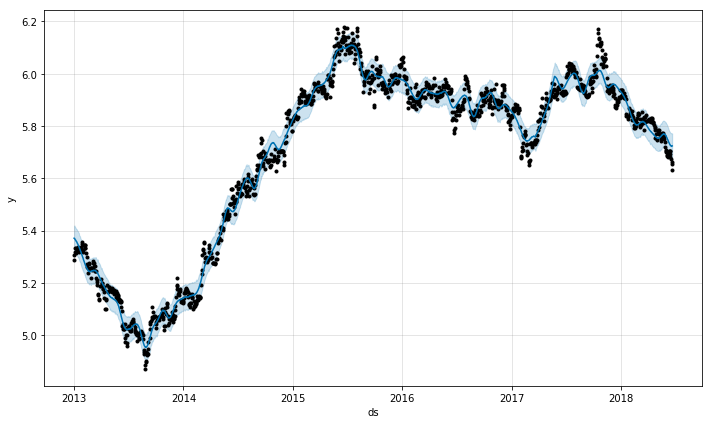

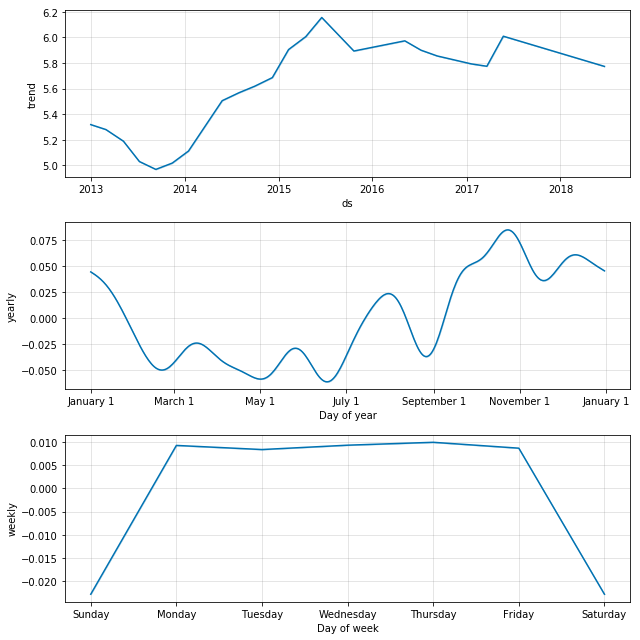

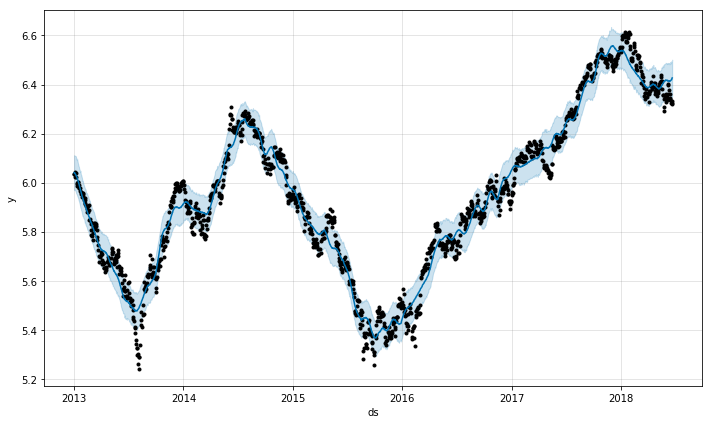

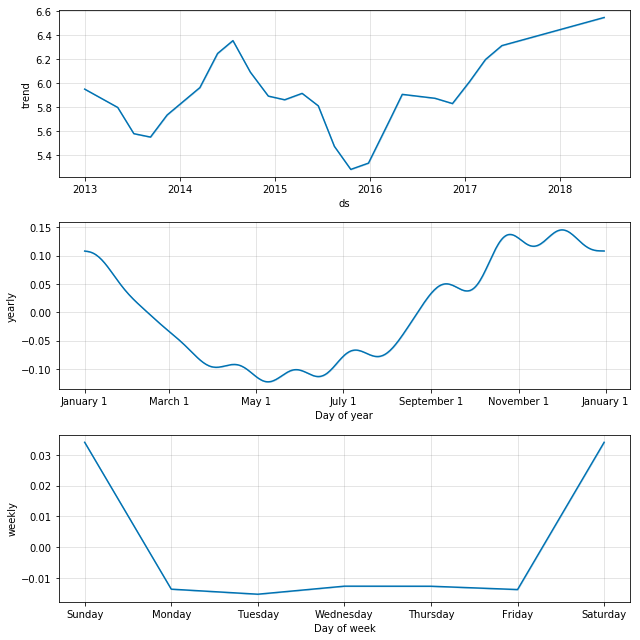

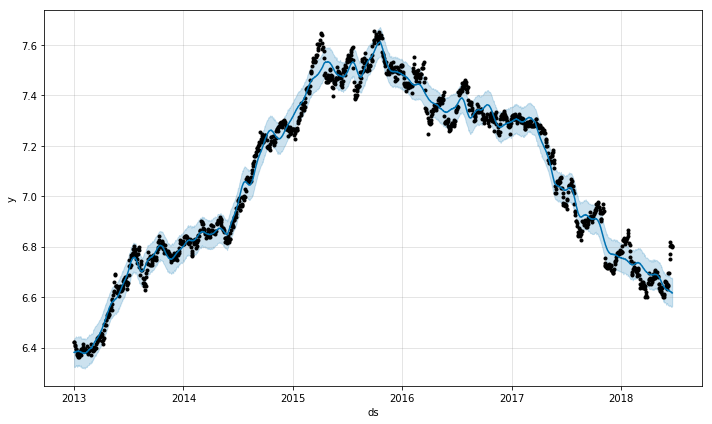

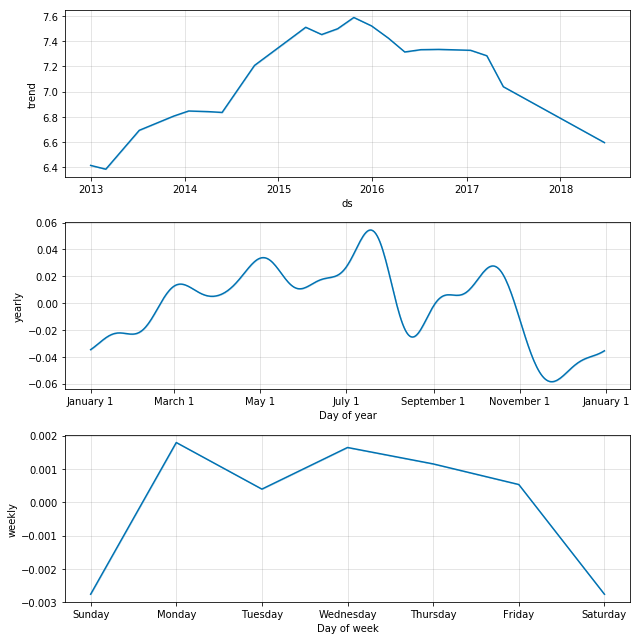

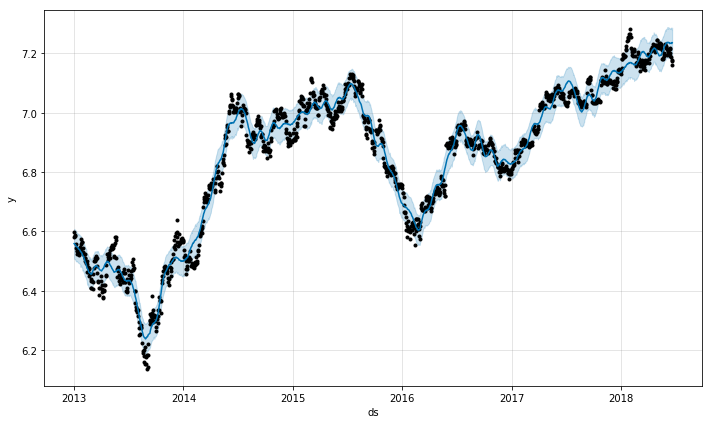

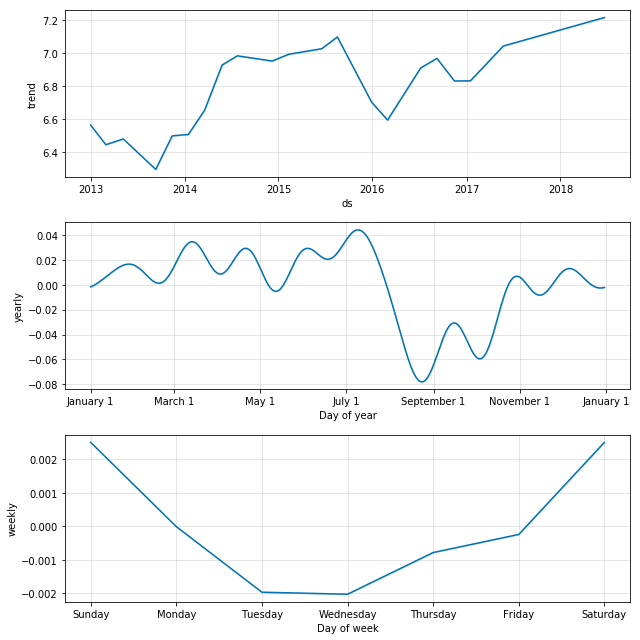

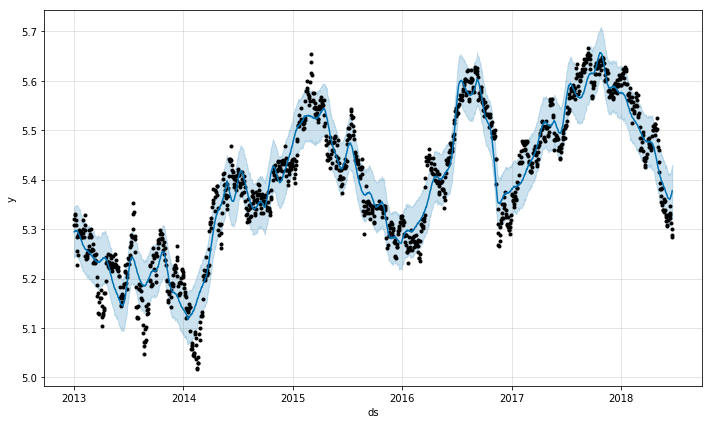

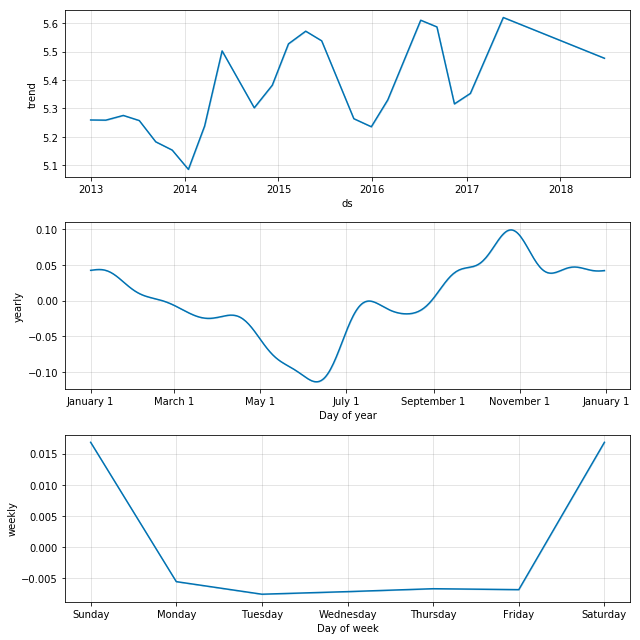

In [108]:
# Creating tuple of stock dataframes
tup_stk_dfs = (stock1_df, stock2_df, stock3_df, stock4_df, stock5_df)

stock1_df, stock2_df, stock3_df, stock4_df, stock5_df = add_vars_to_stock_df(tup_stk_dfs, tickers_for_model)


## Splitting the data for [clustering + model building] and [back-testing]

In [109]:
# Dataframe for Model-Building has data from 01-Jan-2013 to 31-Dec-2017 for each stock
# Dataframe for Back-Testing has data from 01-Jan-2018 to 21-Jun-2018 for each stock

split_date ='2017-12-31'

stock1_df_model = stock1_df.loc[stock1_df.index <= split_date] #[clustering + model building]
stock1_df_BT = stock1_df.loc[stock1_df.index > split_date] #[back-testing]

stock2_df_model = stock2_df.loc[stock2_df.index <= split_date] #[clustering + model building]
stock2_df_BT = stock2_df.loc[stock2_df.index > split_date] #[back-testing]

stock3_df_model = stock3_df.loc[stock3_df.index <= split_date] #[clustering + model building]
stock3_df_BT = stock3_df.loc[stock3_df.index > split_date] #[back-testing]

stock4_df_model = stock4_df.loc[stock4_df.index <= split_date] #[clustering + model building]
stock4_df_BT = stock4_df.loc[stock4_df.index > split_date] #[back-testing]

stock5_df_model = stock5_df.loc[stock5_df.index <= split_date] #[clustering + model building]
stock5_df_BT = stock5_df.loc[stock5_df.index > split_date] #[back-testing]


# EDA, FEATURE SELECTION & MODEL BUILDING FOR STOCK-1

In [110]:
stock3_df_model.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            volume    vwap          nse          spy            dj    ...     \
date                                                                  ...      
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  475306  609.67  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  522833  605.92  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  687589  601.43  6016.149902  1461.890015  13384.290039    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  43.063106  47.687702  47.687702  33.813915  33.813915   
2013-01-02  39.159274  44.844893  44.844893  27.788038  27.788038   
2013-01-03  31.791770  40.493852  40.493852  14.387607  14.387607   
2013-01-04  24.347667  35.111790  35.111790   2.819420   2.819420   
2013-01-07  18.056322  29.426634  29.426634  -4.684301  -4.684301   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    614.700012    614.700012  0.000000  0.000000  0.000000  
2013-01-02    614.808352    614.803864  0.004487  0.002493  0.003989  
2013-01-03    612.482796    612.664690 -0.181894 -0.073075 -0.217637  
2013-01-04    609.962940    610.382200 -0.419260 -0.190347 -0.457827  
2013-01-07    606.930005    607.696237 -0.766231 -0.361659 -0.809144  

[5 rows x 54 columns]

In [111]:
stock3_df_model.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

In [112]:
# Dataframe for Model-building

stock3_df_model = stock3_df_model[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']]

In [113]:
# Dataframe for Back-testing

stock3_df_BT = stock3_df_BT[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']]

### EDA for Stock-1

In [114]:
temp_stock3 = stock3_df_model.copy(deep=True)
temp_stock3.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            volume    vwap          nse          spy            dj    ...     \
date                                                                  ...      
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  475306  609.67  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  522833  605.92  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  687589  601.43  6016.149902  1461.890015  13384.290039    ...      

            le_day_of_week         tr       atr      wr_10       kdjk  \
date                                                                    
2013-01-01               3        NaN       NaN  70.810681  43.063106   
2013-01-02               4   5.900024  5.900024  68.648389  39.159274   
2013-01-03               2  12.400024  9.270394  82.943238  31.791770   
2013-01-04               0   8.200012  8.886857  90.540541  24.347667   
2013-01-07               1  12.099976  9.781509  94.526366  18.056322   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-01-01  47.687702  33.813915  0.000000  0.000000  0.000000  
2013-01-02  44.844893  27.788038  0.004487  0.002493  0.003989  
2013-01-03  40.493852  14.387607 -0.181894 -0.073075 -0.217637  
2013-01-04  35.111790   2.819420 -0.419260 -0.190347 -0.457827  
2013-01-07  29.426634  -4.684301 -0.766231 -0.361659 -0.809144  

[5 rows x 45 columns]

In [115]:
# Summary statistics of numeric data

temp_stock3.describe().T

count          mean           std           min  \
open                 1232.0  1.288477e+03  4.028886e+02    577.500000   
high                 1232.0  1.303896e+03  4.076571e+02    587.099976   
low                  1232.0  1.270289e+03  3.957639e+02    567.650024   
close                1232.0  1.285803e+03  4.016490e+02    579.099976   
adj close            1232.0  1.270048e+03  3.991713e+02    564.387939   
volume               1232.0  1.125132e+06  1.464837e+06      0.000000   
vwap                 1232.0  1.287063e+03  4.016291e+02    579.220000   
nse                  1232.0  7.844810e+03  1.318570e+03   5285.000000   
spy                  1232.0  2.035550e+03  2.778048e+02   1457.150024   
dj                   1232.0  1.781098e+04  2.391204e+03  13328.849609   
nasdaq               1232.0  4.815821e+03  9.312124e+02   3091.810059   
pcod                 1231.0  2.896344e+00  1.047032e+01   -100.949951   
hld                  1232.0  3.360669e+01  2.306337e+01      0.000000   
rsi                  1213.0  5.228571e+01  1.535146e+01     11.210178   
bbul                 1213.0  1.375386e+03  4.288671e+02    607.165000   
bbll                 1213.0  1.213588e+03  3.674418e+02    572.142000   
stma                 1213.0  1.294487e+03  3.954502e+02    591.700000   
ltma                 1113.0  1.340685e+03  3.632864e+02    659.868332   
ema                  1214.0  1.293964e+03  3.944333e+02    594.446857   
scul                 1232.0  6.168831e-02  2.406863e-01      0.000000   
scll                 1232.0  5.194805e-02  2.220123e-01      0.000000   
stma_cut_ltma_b      1232.0  2.435065e-03  4.930627e-02      0.000000   
stma_cut_ltma_a      1232.0  3.246753e-03  5.691081e-02      0.000000   
close_pr_cut_stma_b  1232.0  5.357143e-02  2.252614e-01      0.000000   
close_pr_cut_stma_a  1232.0  5.357143e-02  2.252614e-01      0.000000   
close_pr_cut_ltma_b  1232.0  1.623377e-02  1.264247e-01      0.000000   
close_pr_cut_ltma_a  1232.0  1.704545e-02  1.294933e-01      0.000000   
dr_stock             1231.0  4.730711e-04  1.756499e-02     -0.168817   
dr_nse               1231.0  4.961612e-04  9.188382e-03     -0.059151   
dr_spy               1231.0  5.193335e-04  7.626896e-03     -0.039414   
dr_dj                1231.0  5.237954e-04  7.350011e-03     -0.035748   
dr_nasdaq            1231.0  6.878978e-04  8.997442e-03     -0.041152   
price_movmnt         1231.0  5.190902e-01  4.998385e-01      0.000000   
beta                 1232.0  5.321761e+00  1.514513e+02  -1172.193369   
ts_close_pr          1232.0  1.284617e+03  3.946487e+02    587.715747   
le_day_of_week       1232.0  2.022727e+00  1.412881e+00      0.000000   
tr                   1231.0  3.457851e+01  2.409233e+01      0.000000   
atr                  1231.0  3.451190e+01  1.452942e+01      5.900024   
wr_10                1232.0  4.680245e+01  2.950577e+01      2.023308   
kdjk                 1232.0  5.291069e+01  2.331987e+01      4.496869   
kdjd                 1232.0  5.286960e+01  2.072903e+01      7.557023   
kdjj                 1232.0  5.299287e+01  3.500477e+01    -21.533153   
macd                 1232.0  1.497237e+00  2.810482e+01    -84.995050   
macds                1232.0  1.508466e+00  2.617392e+01    -72.230834   
macdh                1232.0 -2.245919e-02  1.830625e+01    -86.283568   

                               25%            50%           75%           max  
open                    920.887512    1380.000000  1.599225e+03  2.114900e+03  
high                    931.750000    1398.000000  1.610300e+03  2.129000e+03  
low                     910.175003    1356.025024  1.571475e+03  2.077300e+03  
close                   919.825012    1377.549988  1.589150e+03  2.108850e+03  
adj close               901.197525    1359.900695  1.572780e+03  2.085775e+03  
volume               510989.000000  792670.500000  1.275130e+06  2.502858e+07  
vwap                    920.965000    1375.275000  1.593492e+03  2.100650e+03  
nse                    

In [116]:
temp_stock3.isnull().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
tr                       1
a

In [117]:
temp_stock3['ltma'].head(130)

date
2013-01-01           NaN
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
2013-01-09           NaN
2013-01-10           NaN
2013-01-11           NaN
2013-01-14           NaN
2013-01-15           NaN
2013-01-16           NaN
2013-01-17           NaN
2013-01-18           NaN
2013-01-21           NaN
2013-01-22           NaN
2013-01-23           NaN
2013-01-24           NaN
2013-01-25           NaN
2013-01-28           NaN
2013-01-29           NaN
2013-01-30           NaN
2013-01-31           NaN
2013-02-01           NaN
2013-02-04           NaN
2013-02-05           NaN
2013-02-06           NaN
2013-02-07           NaN
2013-02-08           NaN
2013-02-11           NaN
                 ...    
2013-05-28           NaN
2013-05-29           NaN
2013-05-30           NaN
2013-05-31           NaN
2013-06-03           NaN
2013-06-04           NaN
2013-06-05           NaN
2013-06-06           NaN
2013-06-07          

In [118]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

temp_stock3 = temp_stock3.iloc[120:]

In [119]:
temp_stock3['ltma'].head()

date
2013-06-25    661.194999
2013-06-26    662.404582
2013-06-27    663.763749
2013-06-28    665.238333
2013-07-01    666.724583
Name: ltma, dtype: float64

In [120]:
temp_stock3.isnull().sum()

open                   0
high                   0
low                    0
close                  0
adj close              0
volume                 0
vwap                   0
nse                    0
spy                    0
dj                     0
nasdaq                 0
pcod                   0
hld                    0
rsi                    0
bbul                   0
bbll                   0
stma                   0
ltma                   0
ema                    0
scul                   0
scll                   0
stma_cut_ltma_b        0
stma_cut_ltma_a        0
close_pr_cut_stma_b    0
close_pr_cut_stma_a    0
close_pr_cut_ltma_b    0
close_pr_cut_ltma_a    0
dr_stock               0
dr_nse                 0
dr_spy                 0
dr_dj                  0
dr_nasdaq              0
price_movmnt           0
beta                   0
ts_close_pr            0
le_day_of_week         0
tr                     0
atr                    0
wr_10                  0
kdjk                   0


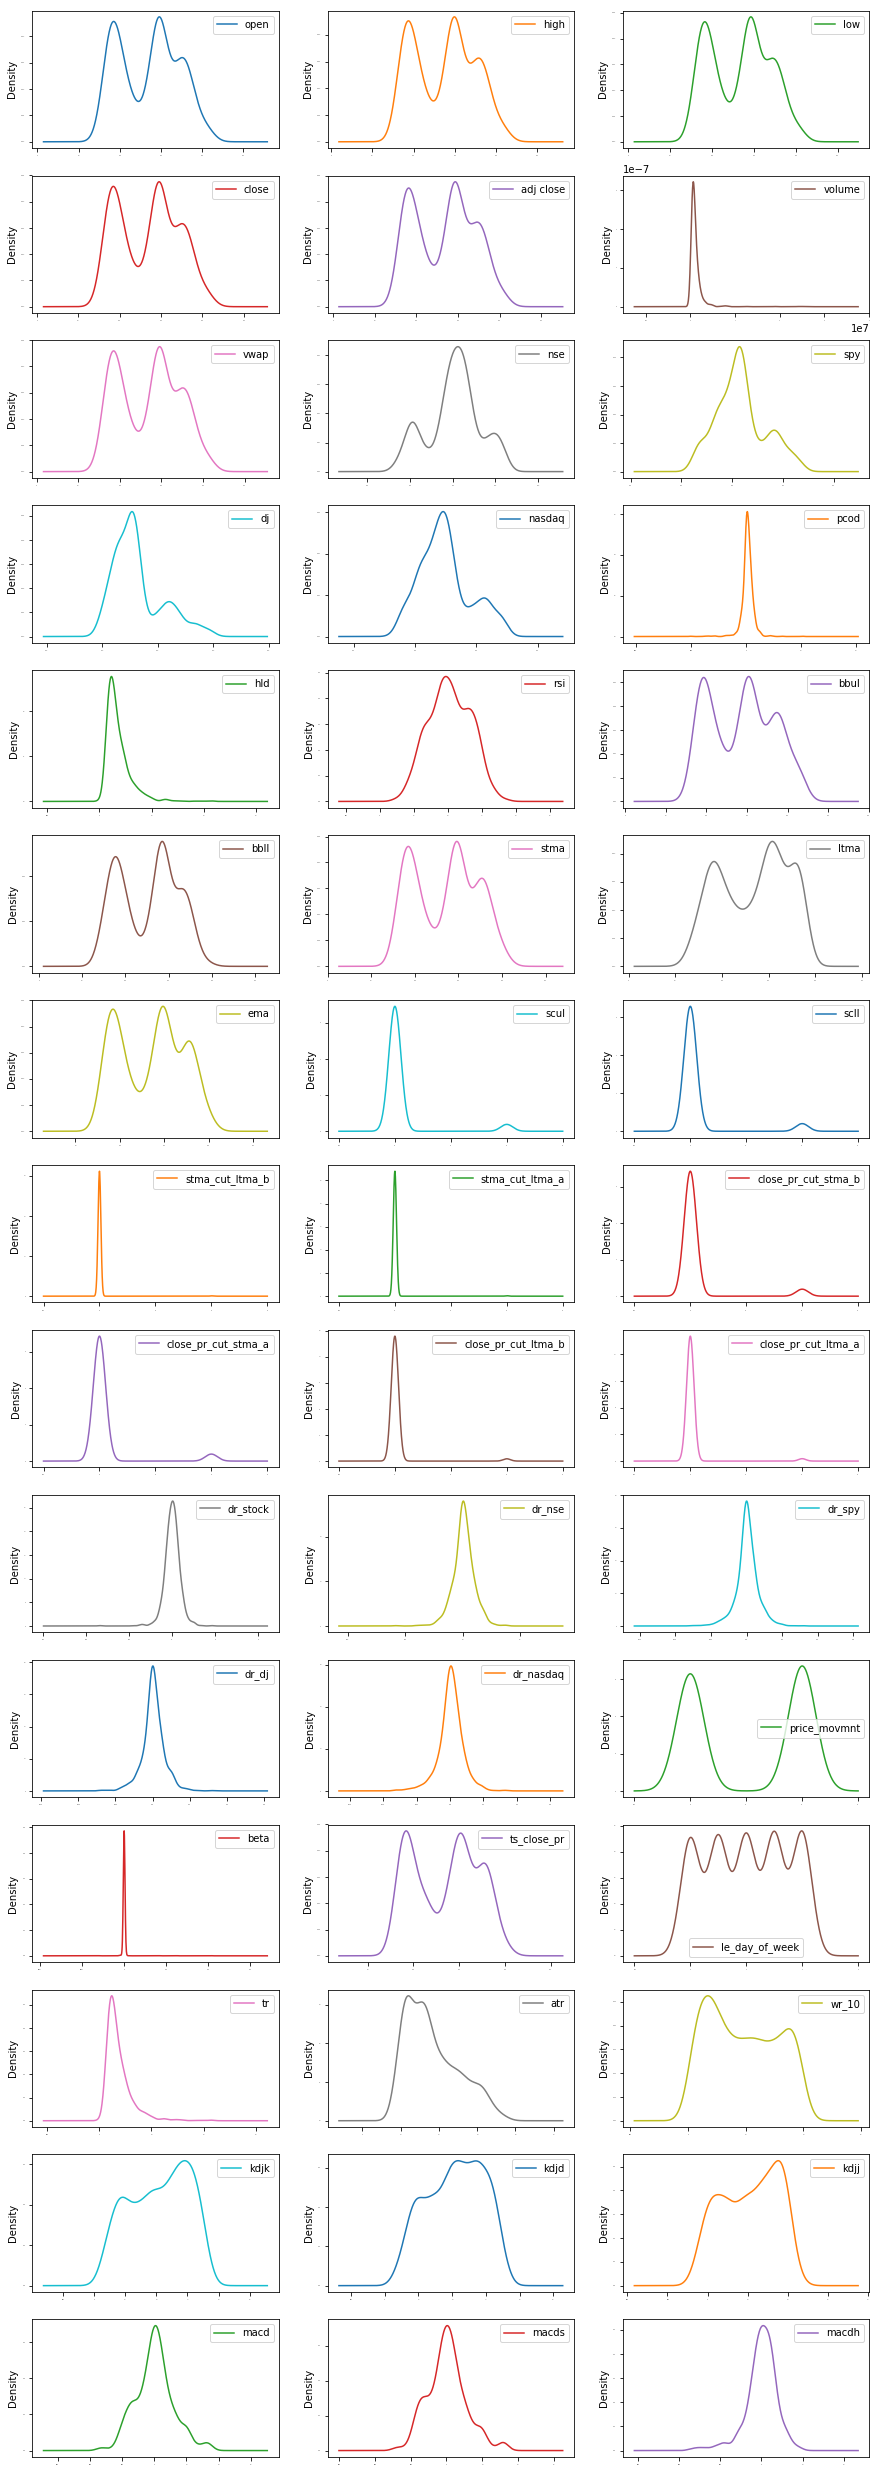

In [121]:
# density plots

temp_stock3.plot(kind='density', subplots=True, layout=(15,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()


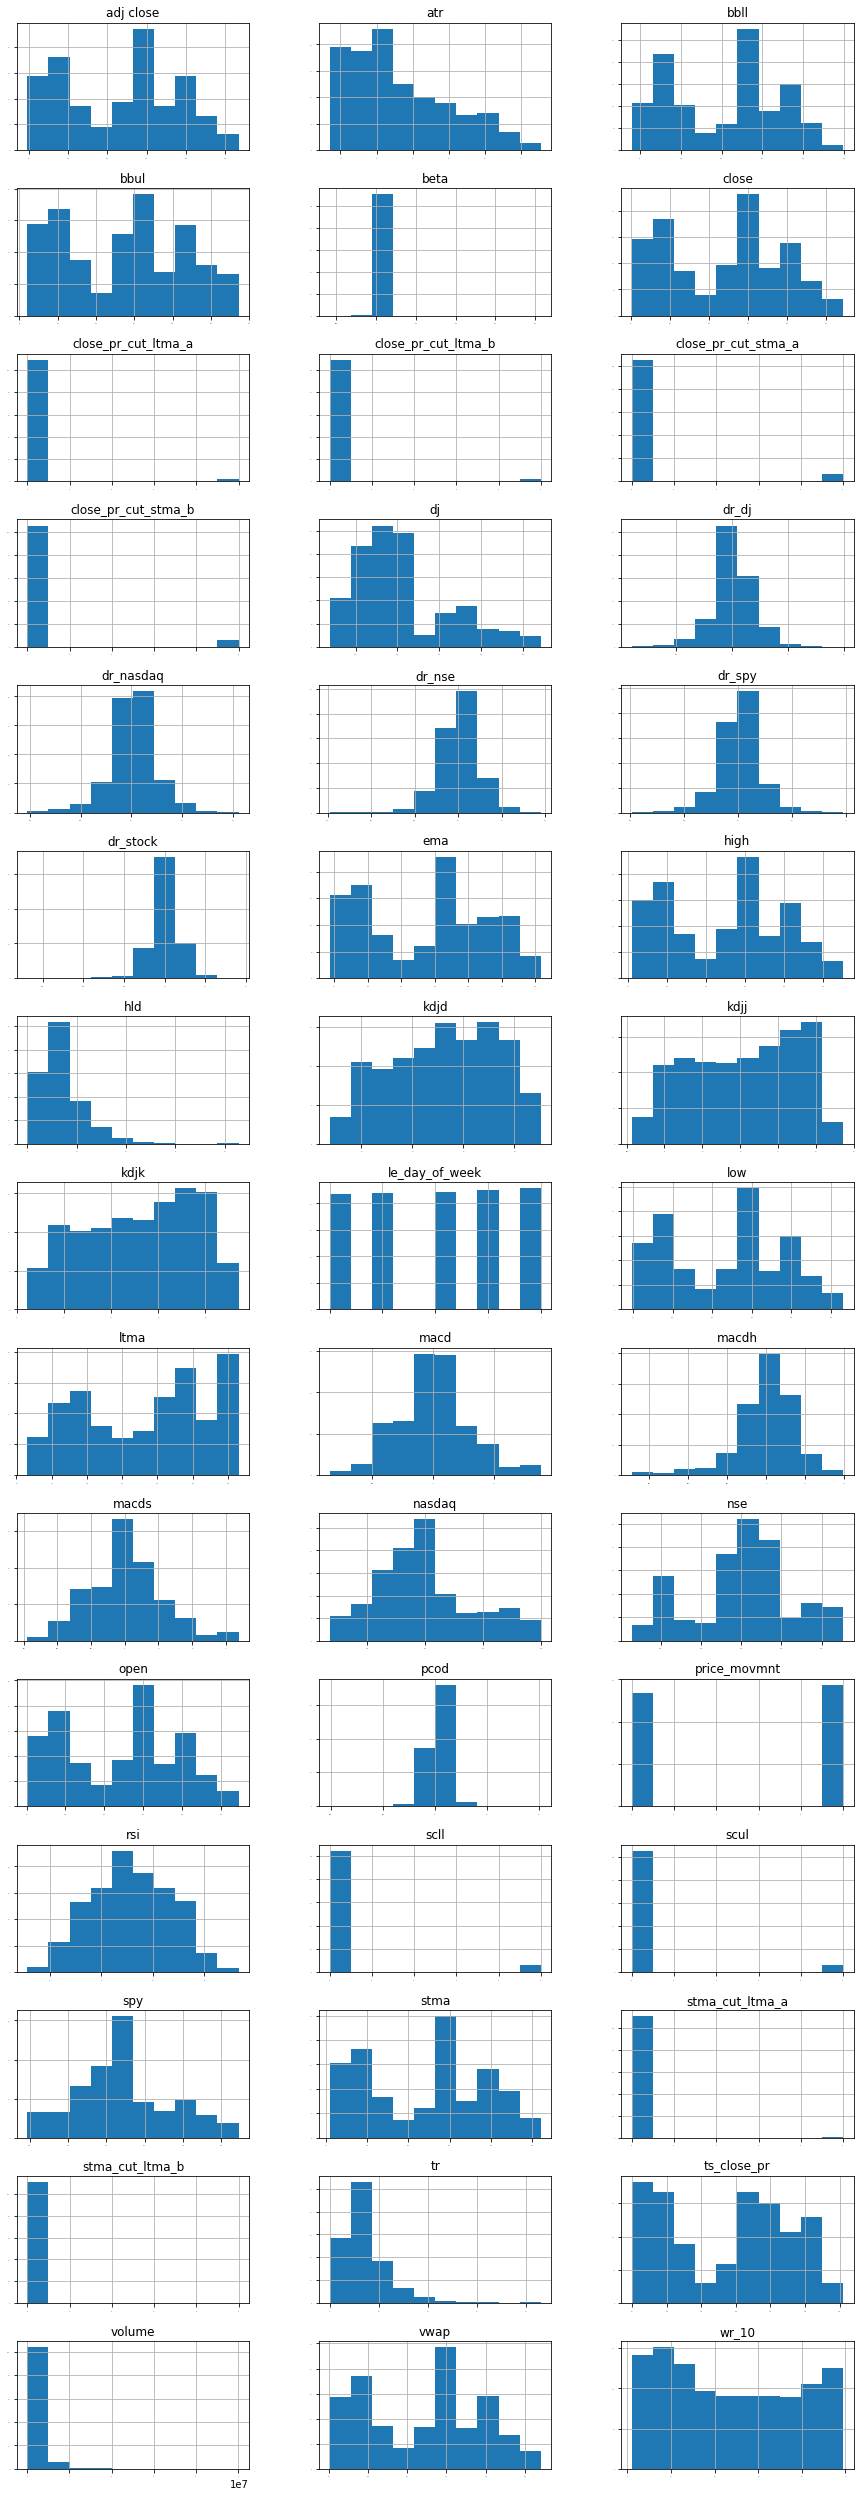

In [122]:
# histograms

temp_stock3.hist(layout=(15,3), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,45))
plt.show()


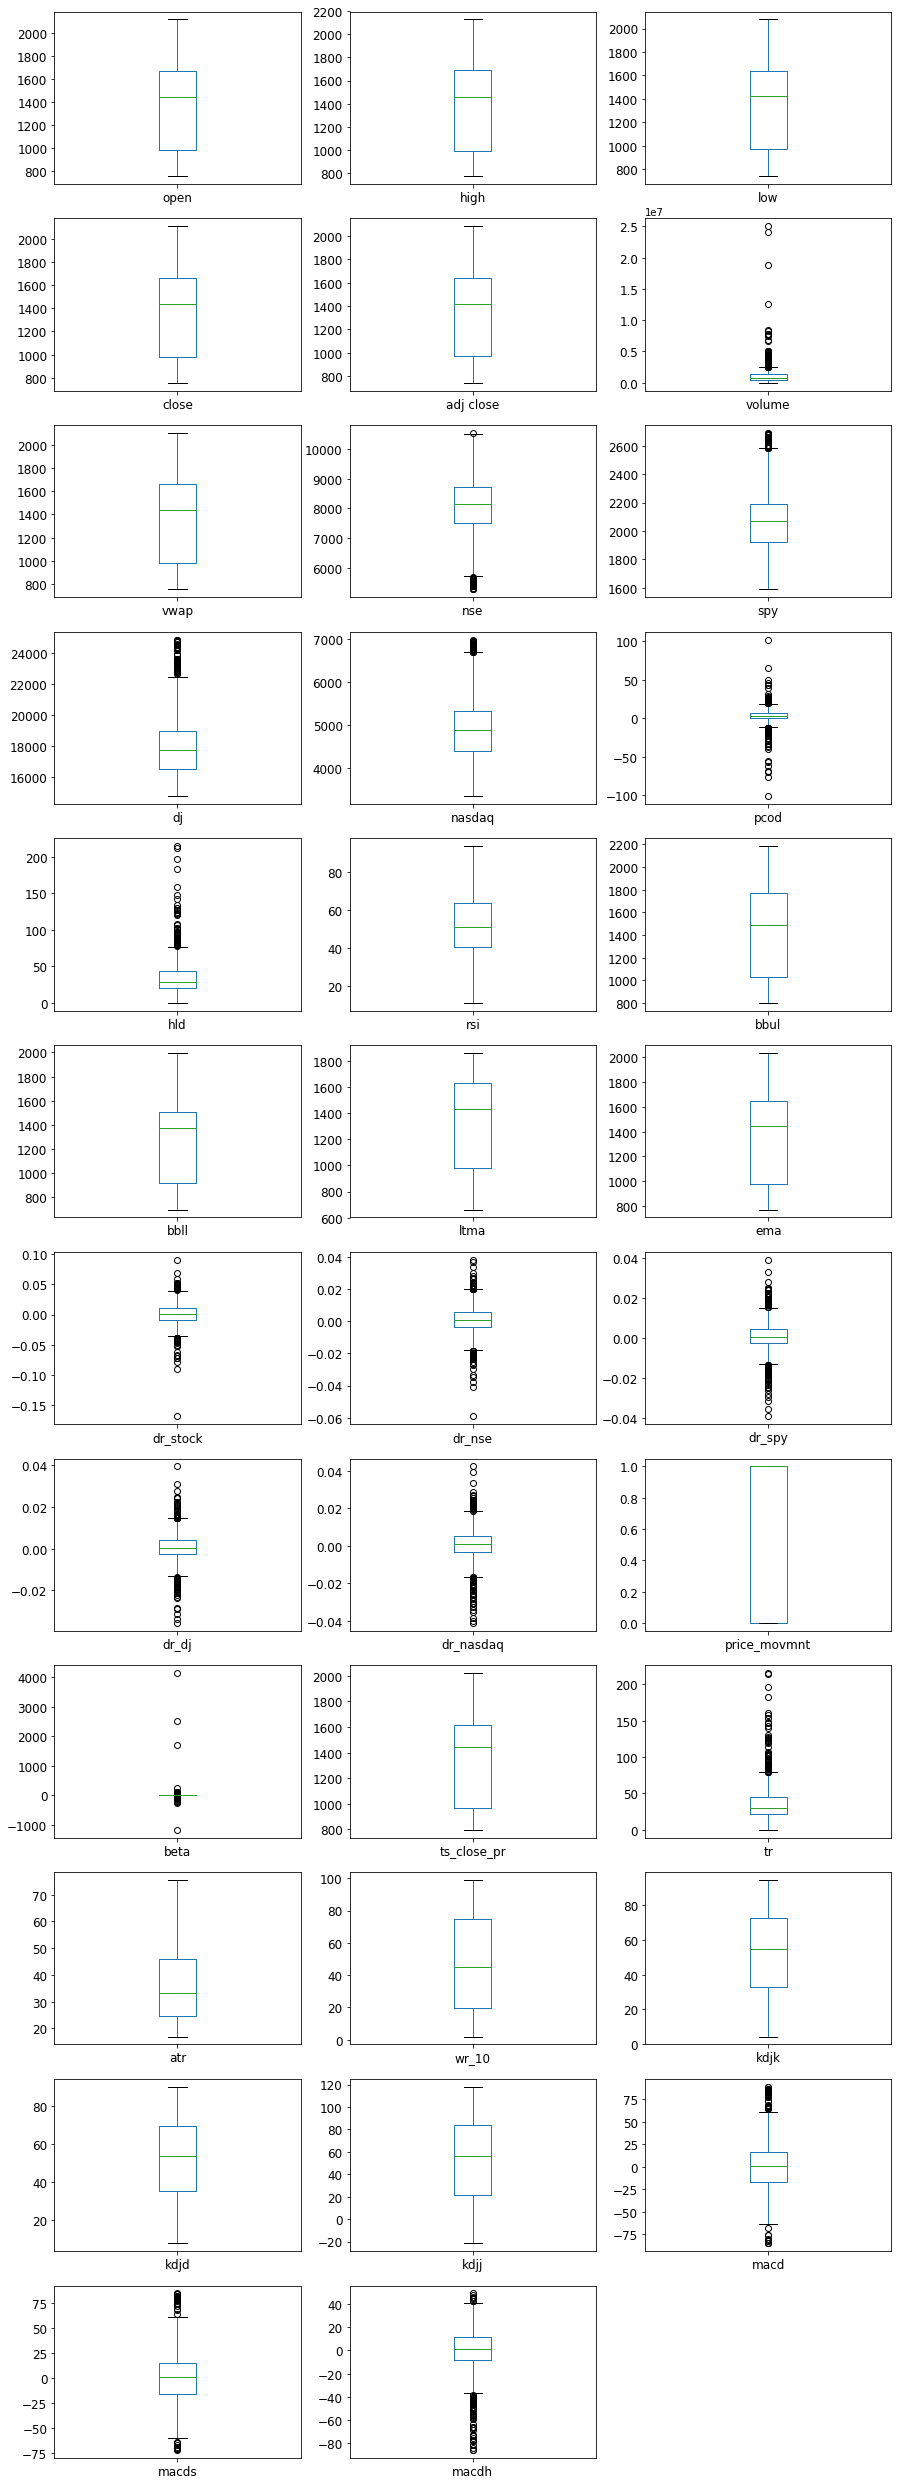

In [123]:
# Box and whisker plots

temp_stock3[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()


In [124]:
temp_stock3['scul'].value_counts()

0    1054
1      58
Name: scul, dtype: int64

In [125]:
temp_stock3['scll'].value_counts()

0    1048
1      64
Name: scll, dtype: int64

In [126]:
temp_stock3['stma_cut_ltma_b'].value_counts()

0    1109
1       3
Name: stma_cut_ltma_b, dtype: int64

In [127]:
temp_stock3['stma_cut_ltma_a'].value_counts()

0    1108
1       4
Name: stma_cut_ltma_a, dtype: int64

In [128]:
temp_stock3['close_pr_cut_stma_b'].value_counts()

0    1053
1      59
Name: close_pr_cut_stma_b, dtype: int64

In [129]:
temp_stock3['close_pr_cut_stma_a'].value_counts()

0    1053
1      59
Name: close_pr_cut_stma_a, dtype: int64

In [130]:
temp_stock3['close_pr_cut_ltma_b'].value_counts()

0    1092
1      20
Name: close_pr_cut_ltma_b, dtype: int64

In [131]:
temp_stock3['close_pr_cut_ltma_a'].value_counts()

0    1091
1      21
Name: close_pr_cut_ltma_a, dtype: int64

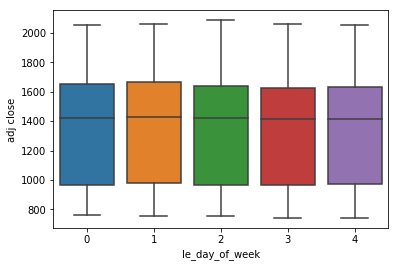

In [132]:
sns.boxplot(x="le_day_of_week", y="adj close", data=temp_stock3)

In [133]:
temp_stock3['price_movmnt'].value_counts()

1.0    574
0.0    538
Name: price_movmnt, dtype: int64

In [134]:
temp1 = temp_stock3[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = temp_stock3[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = temp_stock3[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = temp_stock3[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = temp_stock3[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = temp_stock3[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = temp_stock3[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

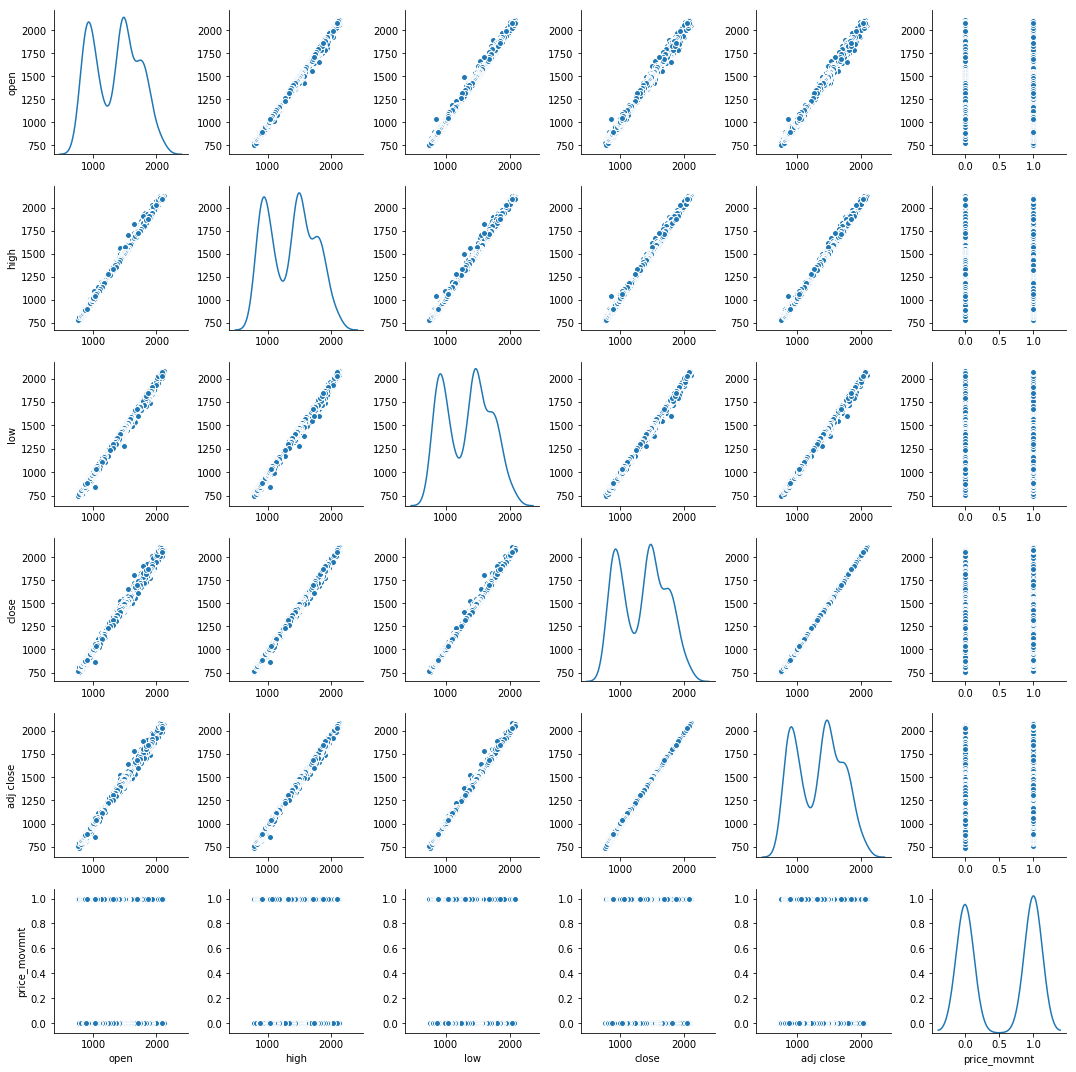

In [135]:
sns.pairplot(temp1, diag_kind='kde')

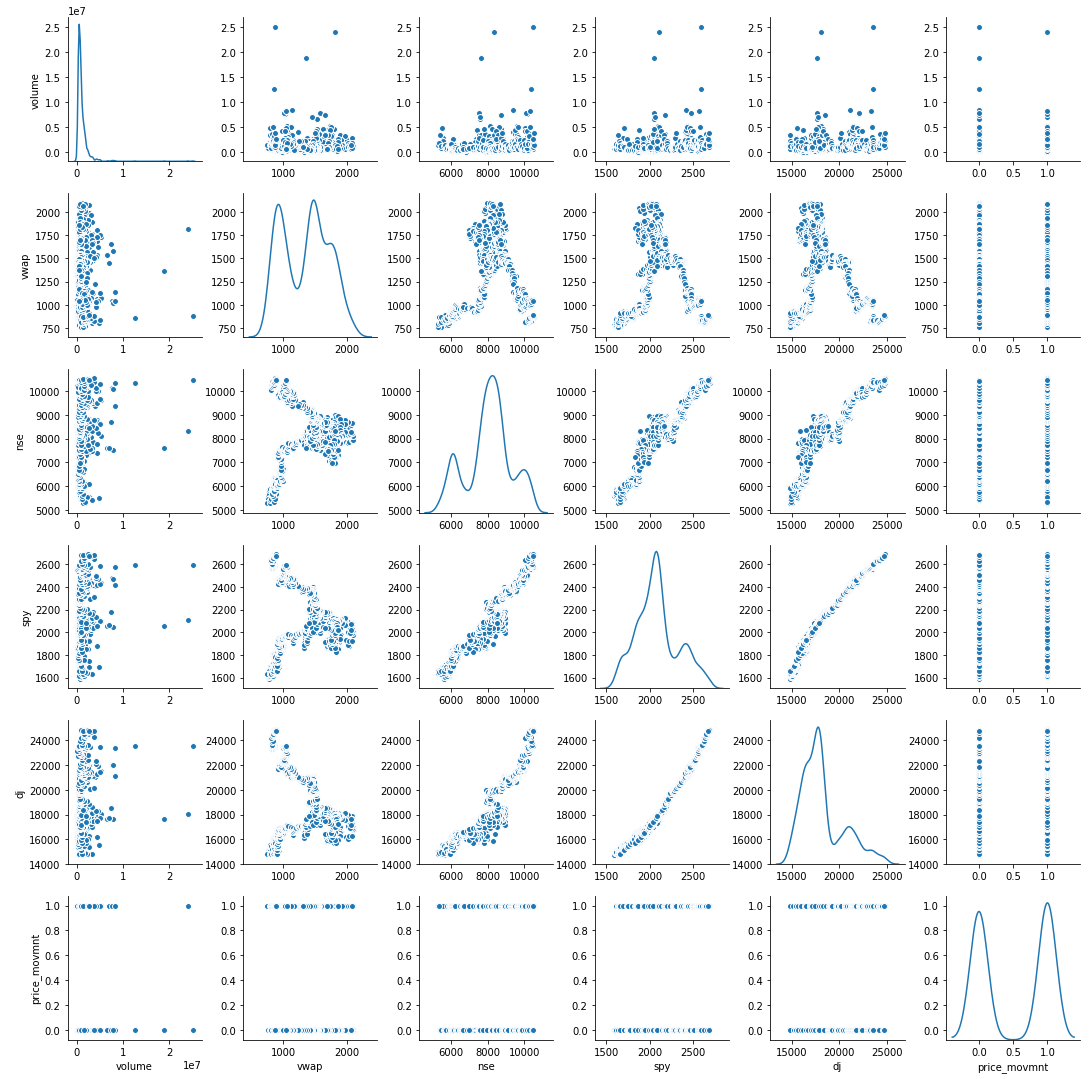

In [136]:
sns.pairplot(temp2, diag_kind='kde')

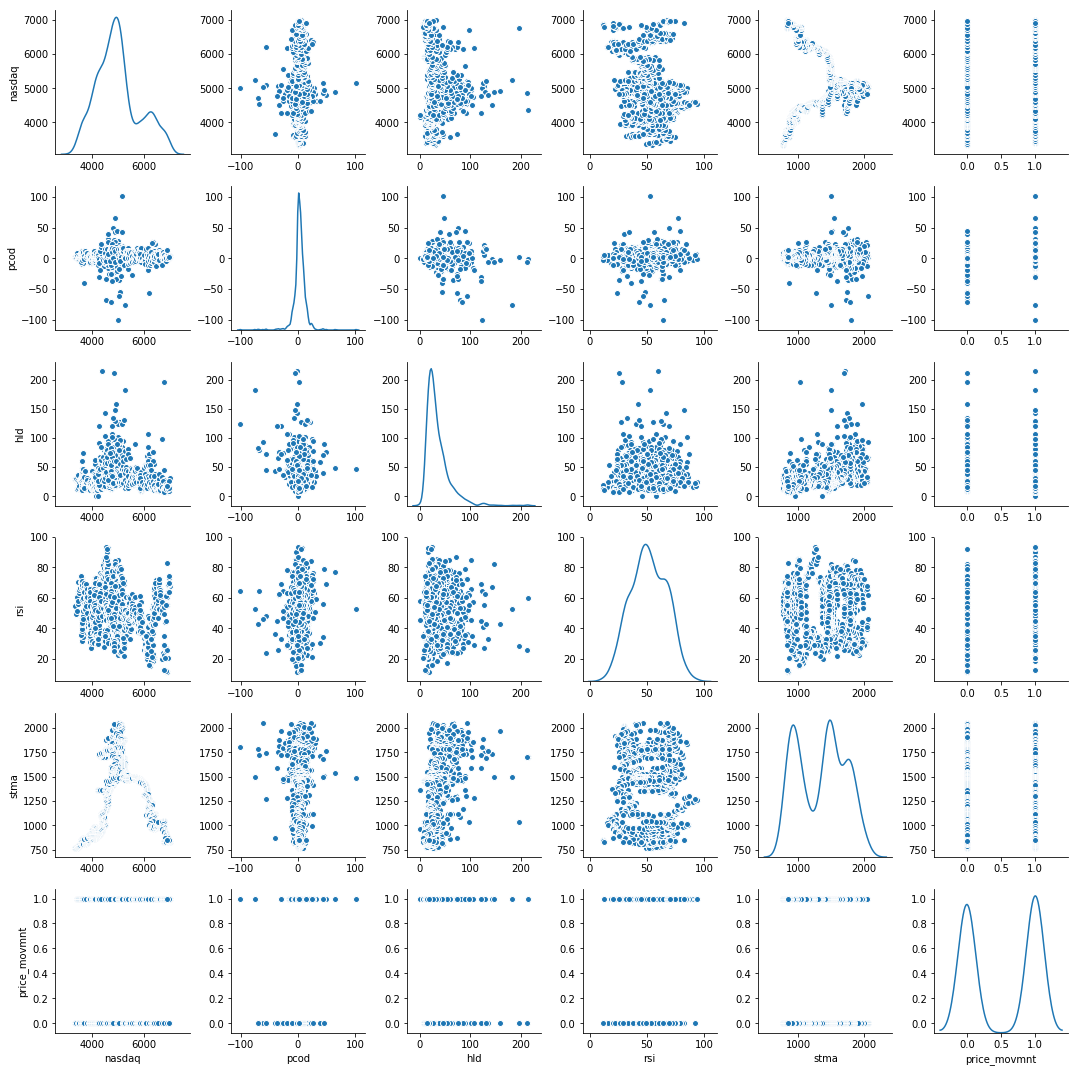

In [137]:
sns.pairplot(temp3, diag_kind='kde')

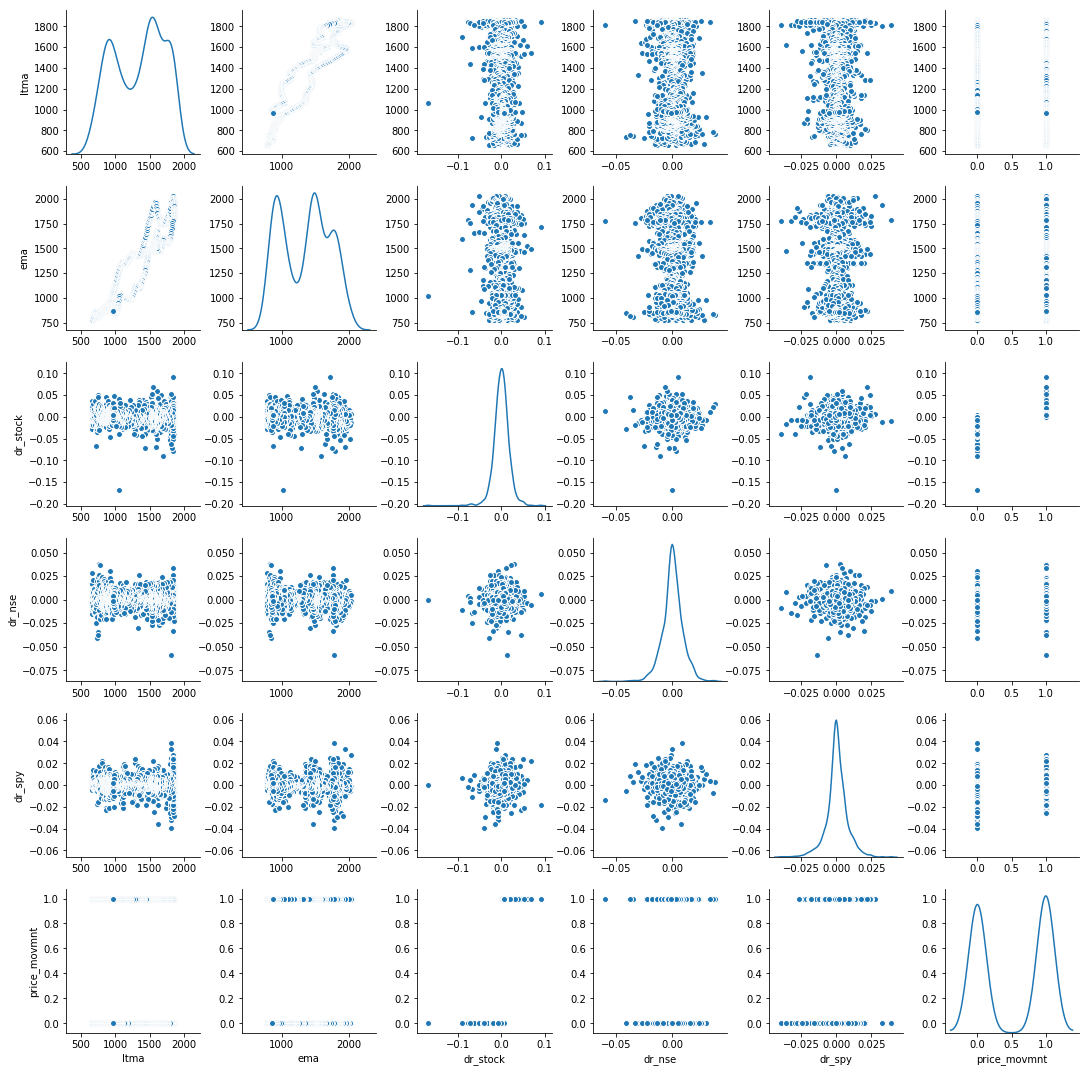

In [138]:
sns.pairplot(temp4, diag_kind='kde')

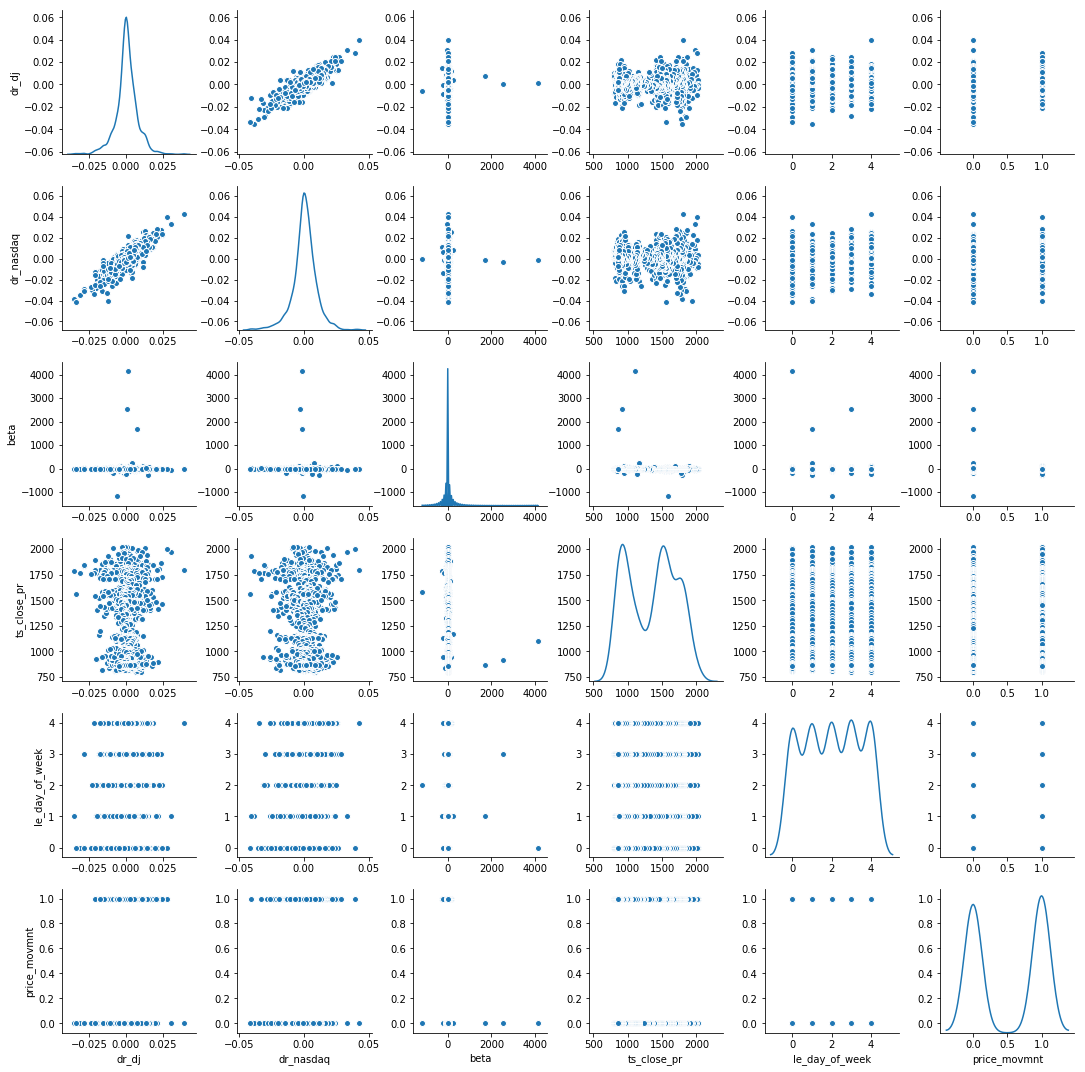

In [139]:
sns.pairplot(temp5, diag_kind='kde')

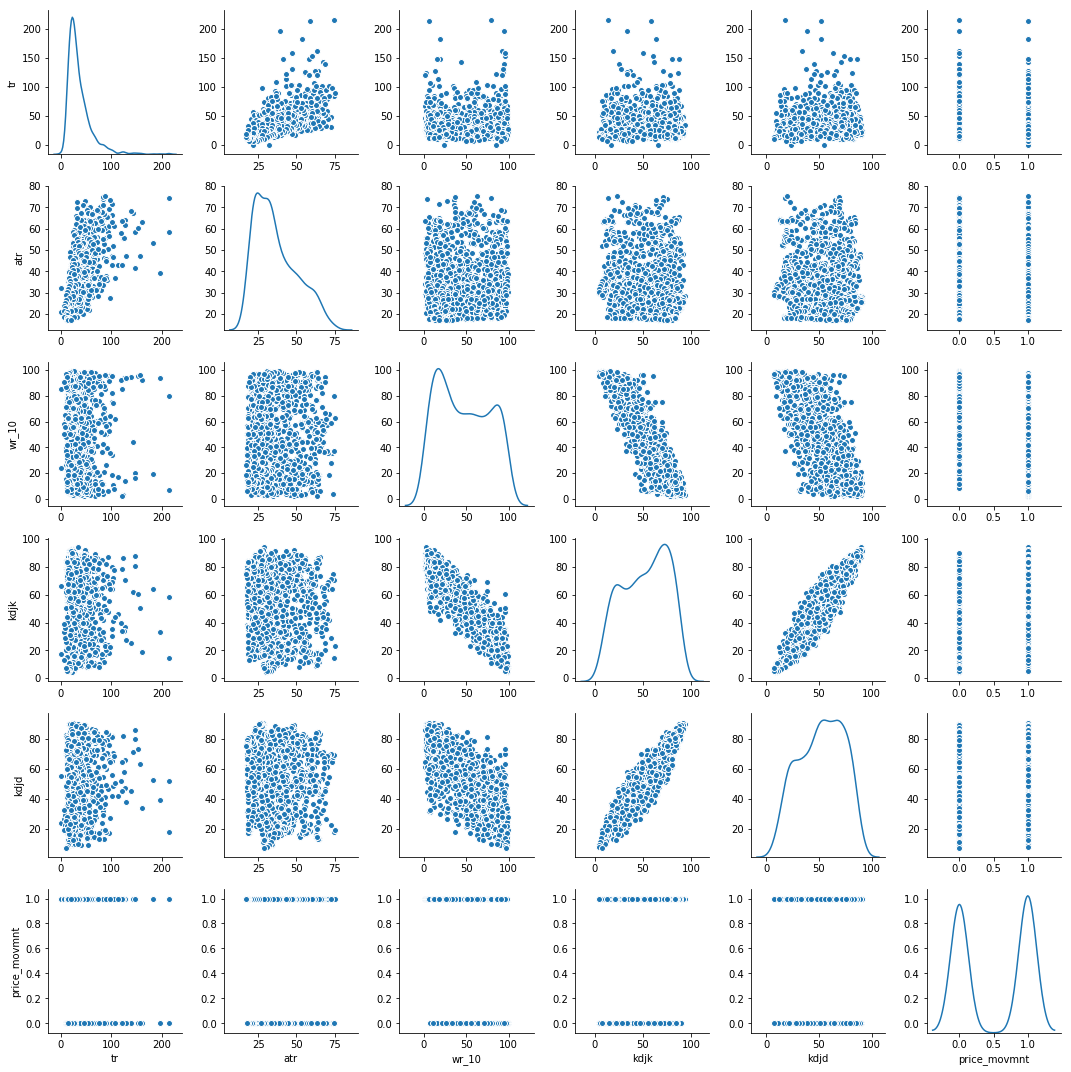

In [140]:
sns.pairplot(temp6, diag_kind='kde')

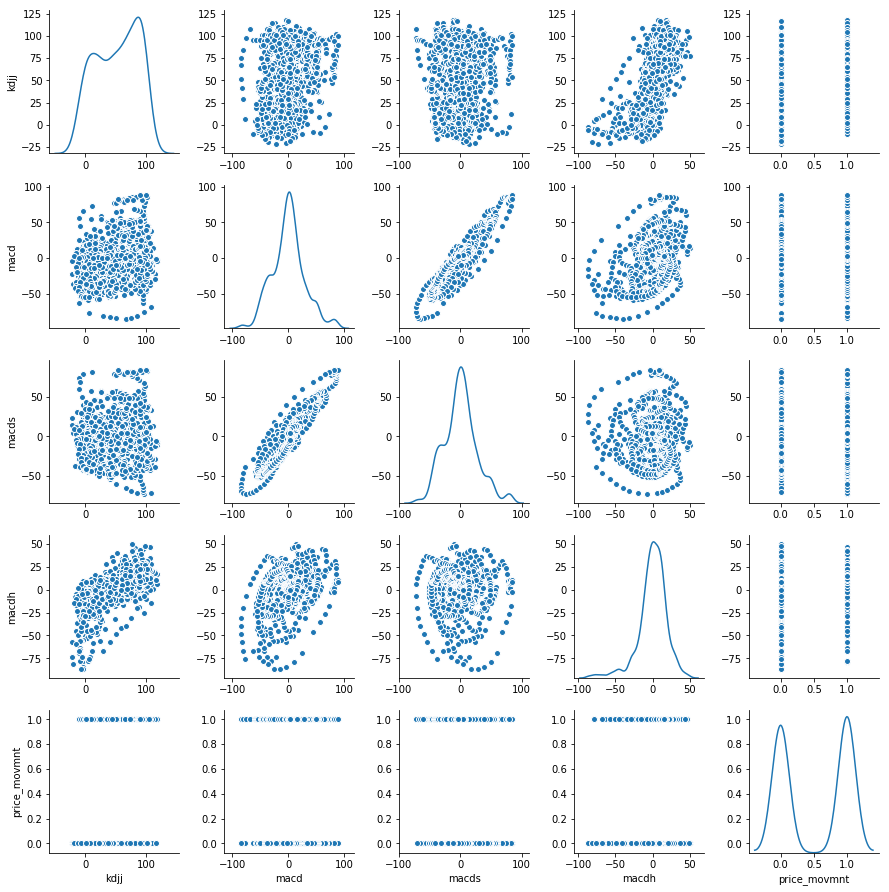

In [141]:
sns.pairplot(temp7, diag_kind='kde')

In [142]:
temp_stock3.head()

open        high         low       close   adj close  \
date                                                                     
2013-06-25  799.000000  799.400024  769.900024  773.900024  754.239075   
2013-06-26  776.000000  784.799988  756.099976  760.049988  740.740906   
2013-06-27  769.000000  779.950012  754.099976  771.950012  752.338623   
2013-06-28  776.500000  787.000000  775.500000  781.450012  761.597290   
2013-07-01  781.450012  787.599976  773.049988  777.150024  757.406555   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-06-25   728688  779.78  5590.250000  1588.030029  14760.309570    ...      
2013-06-26   903162  769.77  5609.100098  1603.260010  14910.139648    ...      
2013-06-27  1475132  767.55  5588.700195  1613.199951  15024.490234    ...      
2013-06-28   908418  782.18  5682.350098  1606.280029  14909.599609    ...      
2013-07-01   510105  778.58  5842.200195  1614.959961  14974.959961    ...      

            le_day_of_week         tr        atr      wr_10       kdjk  \
date                                                                     
2013-06-25               3  29.500000  22.024389  61.530734  61.927246   
2013-06-26               4  28.700012  22.501280  91.897411  43.985694   
2013-06-27               2  25.850036  22.740505  64.827515  41.047957   
2013-06-28               0  15.049988  22.191122  46.108303  45.329204   
2013-07-01               1  14.549988  21.645271  54.581186  45.359074   

                 kdjd       kdjj       macd      macds     macdh  
date                                                              
2013-06-25  69.536861  46.708017  12.805698  13.804705 -1.998015  
2013-06-26  61.019805   9.917471  10.299576  13.103680 -5.608207  
2013-06-27  54.362523  14.418827   9.167938  12.316531 -6.297186  
2013-06-28  51.351416  33.284779   8.934633  11.640152 -5.411037  
2013-07-01  49.353969  37.369284   8.307027  10.973527 -5.333000  

[5 rows x 45 columns]

### Feature Selection for Stock-4

In [143]:
temp_stock3.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

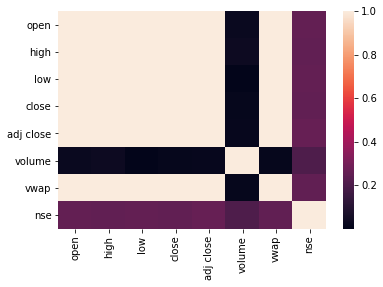

In [144]:
sns.heatmap(temp_stock3[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [145]:
abs(temp_stock3[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

open   high    low  close  adj close  volume   vwap    nse
open        True   True   True   True       True   False   True  False
high        True   True   True   True       True   False   True  False
low         True   True   True   True       True   False   True  False
close       True   True   True   True       True   False   True  False
adj close   True   True   True   True       True   False   True  False
volume     False  False  False  False      False    True  False  False
vwap        True   True   True   True       True   False   True  False
nse        False  False  False  False      False   False  False   True

##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse'. 

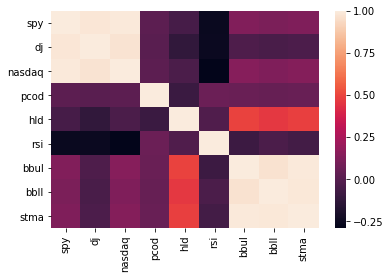

In [146]:
sns.heatmap(temp_stock3[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [147]:
abs(temp_stock3[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

spy     dj  nasdaq   pcod    hld    rsi   bbul   bbll   stma
spy      True   True    True  False  False  False  False  False  False
dj       True   True    True  False  False  False  False  False  False
nasdaq   True   True    True  False  False  False  False  False  False
pcod    False  False   False   True  False  False  False  False  False
hld     False  False   False  False   True  False  False  False  False
rsi     False  False   False  False  False   True  False  False  False
bbul    False  False   False  False  False  False   True   True   True
bbll    False  False   False  False  False  False   True   True   True
stma    False  False   False  False  False  False   True   True   True

##### There is very high multi-collinearity among the variables 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma'. 

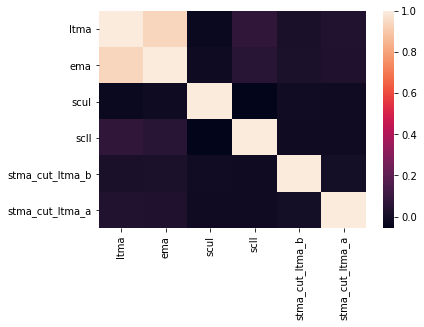

In [148]:
sns.heatmap(temp_stock3[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [149]:
abs(temp_stock3[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

ltma    ema   scul   scll  stma_cut_ltma_b  stma_cut_ltma_a
ltma              True   True  False  False            False            False
ema               True   True  False  False            False            False
scul             False  False   True  False            False            False
scll             False  False  False   True            False            False
stma_cut_ltma_b  False  False  False  False             True            False
stma_cut_ltma_a  False  False  False  False            False             True

##### There is very high multi-collinearity among the variables 'ltma', 'ema'.

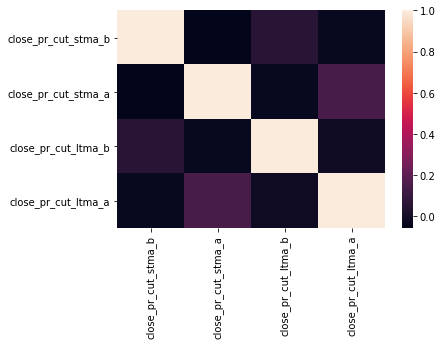

In [150]:
sns.heatmap(temp_stock3[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [151]:
abs(temp_stock3[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

close_pr_cut_stma_b  close_pr_cut_stma_a  \
close_pr_cut_stma_b                 True                False   
close_pr_cut_stma_a                False                 True   
close_pr_cut_ltma_b                False                False   
close_pr_cut_ltma_a                False                False   

                     close_pr_cut_ltma_b  close_pr_cut_ltma_a  
close_pr_cut_stma_b                False                False  
close_pr_cut_stma_a                False                False  
close_pr_cut_ltma_b                 True                False  
close_pr_cut_ltma_a                False                 True

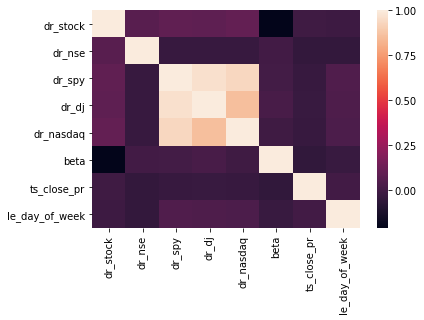

In [152]:
sns.heatmap(temp_stock3[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [153]:
abs(temp_stock3[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

dr_stock  dr_nse  dr_spy  dr_dj  dr_nasdaq   beta  \
dr_stock            True   False   False  False      False  False   
dr_nse             False    True   False  False      False  False   
dr_spy             False   False    True   True       True  False   
dr_dj              False   False    True   True       True  False   
dr_nasdaq          False   False    True   True       True  False   
beta               False   False   False  False      False   True   
ts_close_pr        False   False   False  False      False  False   
le_day_of_week     False   False   False  False      False  False   

                ts_close_pr  le_day_of_week  
dr_stock              False           False  
dr_nse                False           False  
dr_spy                False           False  
dr_dj                 False           False  
dr_nasdaq             False           False  
beta                  False           False  
ts_close_pr            True           False  
le_day_of_week        False            True

##### There is very high multi-collinearity among the variables 'dr_spy', 'dr_dj', 'dr_nasdaq'.

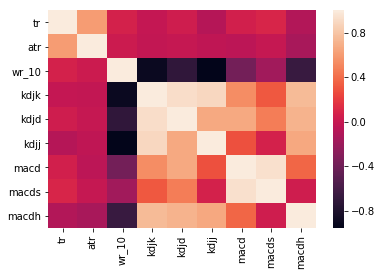

In [154]:
sns.heatmap(temp_stock3[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [155]:
abs(temp_stock3[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

tr    atr  wr_10   kdjk   kdjd   kdjj   macd  macds  macdh
tr      True  False  False  False  False  False  False  False  False
atr    False   True  False  False  False  False  False  False  False
wr_10  False  False   True   True   True   True  False  False  False
kdjk   False  False   True   True   True   True  False  False   True
kdjd   False  False   True   True   True  False  False  False   True
kdjj   False  False   True   True  False   True  False  False  False
macd   False  False  False  False  False  False   True   True  False
macds  False  False  False  False  False  False   True   True  False
macdh  False  False  False   True   True  False  False  False   True

##### There is very high multi-collinearity among the variables 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'. 

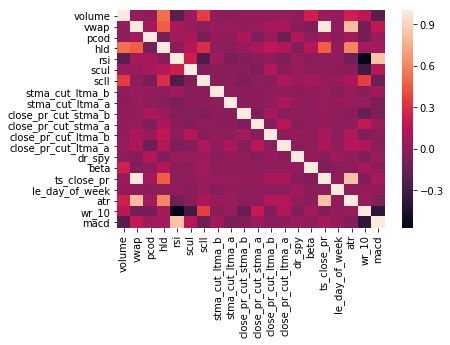

In [156]:
sns.heatmap(temp_stock3[['volume', 'vwap', 'pcod', 'hld', 'rsi', 'scul', 'scll',
                 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b', 
                 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                 'dr_spy', 'beta', 'ts_close_pr', 'le_day_of_week', 'atr', 'wr_10', 'macd']].corr())

##### There is very high multi-collinearity among the variables 'vwap', 'ts_close_pr', 'atr', 'hld', 'rsi', 'macd'.

## Dropping few variables which are highly multi-collinear.

In [157]:
# For Model-building
X = temp_stock3.drop(['open', 'high', 'low', 'close', 'adj close', 'nse', 'spy', 'dj', 'nasdaq',
                      'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_dj',
                      'dr_nasdaq', 'ts_close_pr', 'tr', 'atr', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh', 'price_movmnt'], axis=1)

In [158]:
# For Model-building
y = temp_stock3['price_movmnt']

In [159]:
# For Back-testing
X_BT = stock3_df_BT.drop(['open', 'high', 'low', 'close', 'adj close', 'nse', 'spy', 'dj', 'nasdaq',
                      'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_dj',
                      'dr_nasdaq', 'ts_close_pr', 'tr', 'atr', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh', 'price_movmnt'], axis=1)

In [160]:
# For Back-testing
y_BT = stock3_df_BT['price_movmnt']

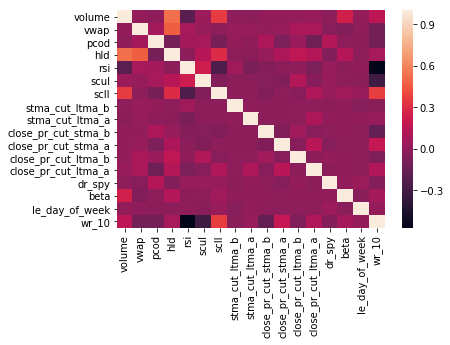

In [161]:
sns.heatmap(X.corr())

### Data preparation for Model building

In [162]:
# Standardise the data of independent variables for Model-building

X_std = StandardScaler().fit_transform(X)
print(X_std.shape)
X_std

(1112, 17)


array([[-0.277861  , -1.58887531, -0.08104276, ..., -0.02368377,
         0.68753715,  0.47335399],
       [-0.16348028, -1.61653724, -0.0947862 , ..., -0.07019584,
         1.39413725,  1.49792642],
       [ 0.21148872, -1.62267205,  0.53273382, ..., -0.06390144,
        -0.01906295,  0.58458746],
       ...,
       [ 1.67696674, -1.31797628, -0.21845518, ..., -0.0311801 ,
         1.39413725, -0.63465525],
       [ 0.80479292, -1.30385515, -0.03065381, ..., -0.04697655,
        -0.01906295, -0.98155406],
       [ 0.95952557, -1.28525727,  1.03657937, ..., -0.06335932,
        -1.43226316, -0.7235509 ]])

### Data preparation for Back-testing

In [163]:
# Standardise the data of independent variables for Back-testing

X_BT_std = StandardScaler().fit_transform(X_BT)
print(X_BT_std.shape)
X_BT_std

(118, 17)


array([[-0.59156263,  1.16107865,  0.73942714, ...,  0.12352931,
        -0.74993294, -0.83064539],
       [-0.48062067,  1.00527915,  0.79465682, ...,  0.08525959,
         0.67735878,  0.34598888],
       [ 1.35561813,  1.03815891,  0.55163825, ...,  0.11266438,
         1.39100465,  0.15783638],
       ...,
       [ 1.86865917,  1.4959464 , -0.27680702, ...,  0.1849742 ,
         0.67735878, -1.31292769],
       [ 0.46877424,  1.4102904 ,  1.55682912, ...,  0.11787053,
         1.39100465, -1.33825345],
       [ 0.18265909,  1.34689147,  1.47949961, ...,  0.12271686,
        -0.03628708, -1.32895595]])

# Hyperparameter tuning


### Models - with Hyper-parameter tuning

In [164]:
# Create objects of required models

models = []
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=7)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=7))))
models.append(("Random Forest Classifier",  RandomForestClassifier(random_state=7)))
models.append(("K-Nearest Neighbors Classifier", KNeighborsClassifier()))
models.append(("Logistic Regression", LogisticRegression(class_weight='balanced', random_state=7)))
#models

Gaussian Naive Bayes Model


******************** Start of Gaussian Naive Bayes ********************

********** Best model object ********** 

 GaussianNB(priors=None)

********** Detailed report of Gaussian Naive Bayes with 10 splits of Time-Series data **********

mean_fit_time          0.00170205
mean_score_time        0.00150201
mean_test_score          0.545545
mean_train_score         0.540727
params                         {}
rank_test_score                 1
split0_test_score        0.485149
split0_train_score       0.529412
split1_test_score        0.594059
split1_train_score       0.507389
split2_test_score        0.554455
split2_train_score       0.546053
split3_test_score        0.584158
split3_train_score       0.545679
split4_test_score        0.534653
split4_train_score       0.592885
split5_test_score        0.584158
split5_train_score       0.584843
split6_test_score        0.584158
split6_train_score       0.521186
split7_test_score        0.475248
split7_train_score

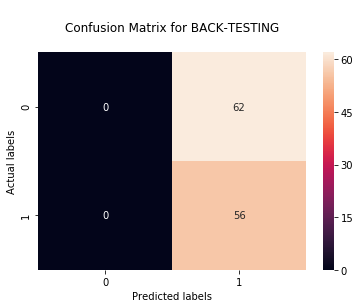


******************** End of Gaussian Naive Bayes model ******************** 


Decision Tree Classifier Model


******************** Start of Decision Tree Classifier ********************

********** Best model object ********** 

 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='random')

********** Detailed report of Decision Tree Classifier with 10 splits of Time-Series data **********

mean_fit_time                                                0.00180752
mean_score_time                                              0.00142982
mean_test_score                                                 0.69703
mean_train_score                                               0.854808
param_criterion              

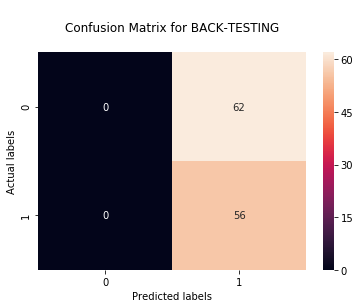


******************** End of Decision Tree Classifier model ******************** 


AdaBoost Classifier Model


******************** Start of AdaBoost Classifier ********************

********** Best model object ********** 

 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)

********** Detailed report of AdaBoost Classifier with 10 splits of Time-Series data **********

mean_fit_time                                                              0.0460921
mean_score_time                                                           0.00249405
mean_test_score            

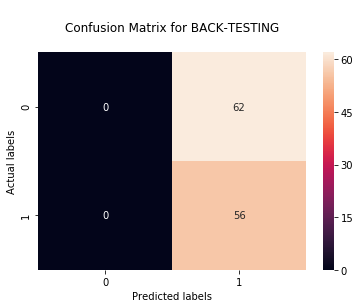


******************** End of AdaBoost Classifier model ******************** 


Random Forest Classifier Model


******************** Start of Random Forest Classifier ********************

********** Best model object ********** 

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

********** Detailed report of Random Forest Classifier with 10 splits of Time-Series data **********

mean_fit_time                                                 0.0144469
mean_score_time                                              0.00224333
mean_test_score                                                0.705941
mean_train_score                               

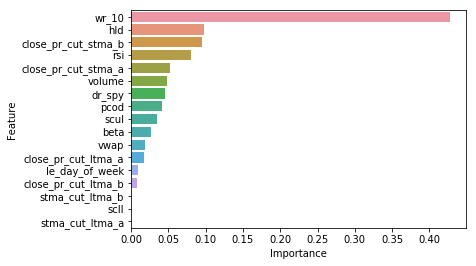



******************** BACK-TESTING ********************

BACK-TEST accuracy for Random Forest Classifier is 0.47


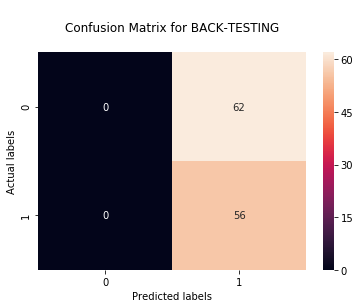


******************** End of Random Forest Classifier model ******************** 


K-Nearest Neighbors Classifier Model


******************** Start of K-Nearest Neighbors Classifier ********************

********** Best model object ********** 

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

********** Detailed report of K-Nearest Neighbors Classifier with 10 splits of Time-Series data **********

mean_fit_time                 0.00154953
mean_score_time               0.00215337
mean_test_score                 0.521782
mean_train_score                0.685316
param_n_neighbors                      5
params                {'n_neighbors': 5}
rank_test_score                        1
split0_test_score               0.514851
split0_train_score              0.696078
split1_test_score                0.49505
split1_train_score              0.714286
split2_test_score          

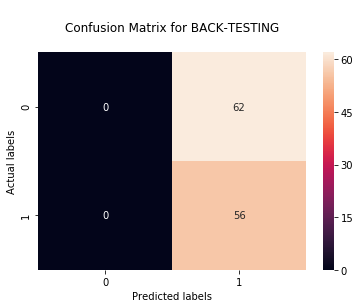


******************** End of K-Nearest Neighbors Classifier model ******************** 


Logistic Regression Model


******************** Start of Logistic Regression ********************

********** Best model object ********** 

 LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

********** Detailed report of Logistic Regression with 10 splits of Time-Series data **********

mean_fit_time                             0.0061594
mean_score_time                          0.00196576
mean_test_score                            0.657426
mean_train_score                           0.656936
param_C                                       0.001
param_penalty                                    l2
params                {'C': 0.001, 'penalty': 'l2'}
rank_test_score                    

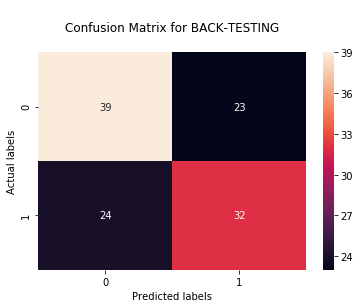


******************** End of Logistic Regression model ******************** 




In [167]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits = n_splits)

for name, model in models:
    
    if name=='K-Nearest Neighbors Classifier':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        k_values = np.arange(1, 30, 2)
        parameters = {'n_neighbors':k_values}

        knn_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X_std))
        knn_grid.fit(X,y)
        results = pd.DataFrame(knn_grid.cv_results_)
        results.to_csv('KNN_results.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', knn_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[knn_grid.best_index_, :])
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = knn_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2)))) 
         
        y_BT_pred = knn_grid.predict(X_BT_std)        
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))       
        
    
        
    elif name=='Logistic Regression':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        penalty = ['l1','l2']
        Cs = [0.001, 0.01, 0.1]
        parameters = {'penalty':penalty, 'C':Cs}
        
        logit_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        logit_grid.fit(X,y)
        results = pd.DataFrame(logit_grid.cv_results_)
        results.to_csv('LogitReg_results.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', logit_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[logit_grid.best_index_, :])
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = logit_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2))))
        
        y_BT_pred = logit_grid.predict(X_BT_std)        
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))
        
    
    elif name=='Decision Tree Classifier':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        parameters = {'criterion' : ['gini', 'entropy'],
                      'splitter' : ['best', 'random'],
                      'max_depth': np.arange(3, 11)
                     }        
        
        dt_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        dt_grid.fit(X,y)
        results = pd.DataFrame(dt_grid.cv_results_)
        results.to_csv('DT_results.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', dt_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[dt_grid.best_index_, :])
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = dt_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2)))) 
        
        y_BT_pred = dt_grid.predict(X_BT_std)        
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))       
        
        
    elif name=='Gaussian Naive Bayes':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        parameters = {}        
        
        gnb_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        gnb_grid.fit(X,y)
        results = pd.DataFrame(gnb_grid.cv_results_)
        results.to_csv('GNB.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', gnb_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[gnb_grid.best_index_, :])
        
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = gnb_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2))))        
          
        y_BT_pred = gnb_grid.predict(X_BT_std)        
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))
        
        
    elif name=='AdaBoost Classifier':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        parameters = {'base_estimator__criterion' : ['gini', 'entropy'],
                      'base_estimator__splitter' : ['best', 'random'],
                      'base_estimator__max_depth': np.arange(3, 11),
                      'n_estimators': np.arange(1, 16)
                     }
        
        ada_boost_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        ada_boost_grid.fit(X,y)
        results = pd.DataFrame(ada_boost_grid.cv_results_)
        results.to_csv('AdaBoost.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', ada_boost_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[ada_boost_grid.best_index_, :])
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = ada_boost_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2))))      
         
        y_BT_pred = ada_boost_grid.predict(X_BT_std)        
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))       
        

        
    elif name=='Random Forest Classifier':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        parameters = {'n_estimators': np.arange(3, 11),
                      'criterion' : ['gini', 'entropy'], 
                      'max_depth': np.arange(3, 11)
                     }           
        
        rf_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        rf_grid.fit(X,y)
        results = pd.DataFrame(rf_grid.cv_results_)
        results.to_csv('RF.csv')
        #print(results.head())

        print('\n\n******************** Start of {} ********************'.format(name))
        print('\n********** Best model object ********** \n\n', rf_grid.best_estimator_)
        print('\n********** Detailed report of {} with {} splits of Time-Series data **********\n'.format(name, n_splits))
        print(results.iloc[rf_grid.best_index_, :])
        
        print('\nFEATURE IMPORTANCE\n')
        indices = np.argsort(rf_grid.best_estimator_.feature_importances_)[::-1]
        feature_rank = pd.DataFrame( columns = ['Rank', 'Feature', 'Importance'] )
        for f in range(X.shape[1]):
            feature_rank.loc[f] = [f+1, X.columns[indices[f]], rf_grid.best_estimator_.feature_importances_[indices[f]]]
        sns.barplot( y = 'Feature', x = 'Importance', data = feature_rank)
        plt.show()
        
        print('\n\n******************** BACK-TESTING ********************\n')  
        accuracy = rf_grid.score(X_BT_std, y_BT)
        print('BACK-TEST accuracy for {} is {}'.format(name, str(round(accuracy, 2))))   
         
        y_BT_pred = rf_grid.predict(X_BT_std)       
        cm = metrics.confusion_matrix(y_BT, y_BT_pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
        # title, labels and ticks
        ax.set_title('\nConfusion Matrix for BACK-TESTING\n')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels') 
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        plt.show()
        print('\n******************** End of {} model ******************** \n\n'.format(name))
       
        